# 1. Import and understand the data. [5 Marks]
## A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
import os

from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate,train_test_split,KFold,cross_val_score,StratifiedKFold,RandomizedSearchCV,RepeatedStratifiedKFold,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pickle

In [2]:
signal=pd.read_csv("signal-data.csv")
signal.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [3]:
signal.tail()

Time        0        1          2          3       4  \
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5        6       7       8  ...       581     582     583     584  \
1562  100.0  82.2467  0.1248  1.3424  ...  203.1720  0.4988  0.0143  0.0039   
1563  100.0  98.4689  0.1205  1.4333  ...       NaN  0.4975  0.0131  0.0036   
1564  100.0  99.4122  0.1208     NaN  ...   43.5231  0.4987  0.0153  0.0041   
1565  100.0  98.7978  0.1213  1.4622  ...   93.4941  0.5004  0.0178  0.0038   
1566  100.0  85.1011  0.1235     NaN  ...  137.7844  0.4987  0.0181  0.0040   

         585     586     587     588       589  Pass/Fail  
1562  2.8669  0.0068  0.0138  0.0047  203.1720         -1  
1563  2.6238  0.0068  0.0138  0.0047  203.1720         -1  
1564  3.0590  0.0197  0.0086  0.0025   43.5231         -1  
1565  3.5662  0.0262  0.0245  0.0075   93.4941         -1  
1566  3.6275  0.0117  0.0162  0.0045  137.7844         -1  

[5 rows x 592 columns]

In [4]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
signal.count()

Time         1567
0            1561
1            1560
2            1553
3            1553
             ... 
586          1566
587          1566
588          1566
589          1566
Pass/Fail    1567
Length: 592, dtype: int64

In [6]:
signal.describe().apply(lambda x: x.apply('{0:.5f}'.format))

0           1           2           3           4           5  \
count  1561.00000  1560.00000  1553.00000  1553.00000  1553.00000  1553.00000   
mean   3014.45290  2495.85023  2200.54732  1396.37663     4.19701   100.00000   
std      73.62179    80.40770    29.51315   441.69164    56.35554     0.00000   
min    2743.24000  2158.75000  2060.66000     0.00000     0.68150   100.00000   
25%    2966.26000  2452.24750  2181.04440  1081.87580     1.01770   100.00000   
50%    3011.49000  2499.40500  2201.06670  1285.21440     1.31680   100.00000   
75%    3056.65000  2538.82250  2218.05550  1591.22350     1.52570   100.00000   
max    3356.35000  2846.44000  2315.26670  3715.04170  1114.53660   100.00000   

                6           7           8           9  ...        581  \
count  1553.00000  1558.00000  1565.00000  1565.00000  ...  618.00000   
mean    101.11291     0.12182     1.46286    -0.00084  ...   97.93437   
std       6.23721     0.00896     0.07390     0.01512  ...   87.52097   
min      82.13110     0.00000     1.19100    -0.05340  ...    0.00000   
25%      97.92000     0.12110     1.41120    -0.01080  ...   46.18490   
50%     101.51220     0.12240     1.46160    -0.00130  ...   72.28890   
75%     104.58670     0.12380     1.51690     0.00840  ...  116.53915   
max     129.25220     0.12860     1.65640     0.07490  ...  737.30480   

              582         583         584         585         586         587  \
count  1566.00000  1566.00000  1566.00000  1566.00000  1566.00000  1566.00000   
mean      0.50010     0.01532     0.00385     3.06783     0.02146     0.01647   
std       0.00340     0.01718     0.00372     3.57803     0.01236     0.00881   
min       0.47780     0.00600     0.00170     1.19750    -0.01690     0.00320   
25%       0.49790     0.01160     0.00310     2.30650     0.01342     0.01060   
50%       0.50020     0.01380     0.00360     2.75765     0.02050     0.01480   
75%       0.50238     0.01650     0.00410     3.29517     0.02760     0.02030   
max       0.50980     0.47660     0.10450    99.30320     0.10280     0.07990   

              588         589   Pass/Fail  
count  1566.00000  1566.00000  1567.00000  
mean      0.00528    99.67007    -0.86726  
std       0.00287    93.89192     0.49801  
min       0.00100     0.00000    -1.00000  
25%       0.00330    44.36860    -1.00000  
50%       0.00460    71.90050    -1.00000  
75%       0.00640   114.74970    -1.00000  
max       0.02860   737.30480     1.00000  

[8 rows x 591 columns]

## B. Print 5 point summary and share at least 2 observations. [3 Marks]

In [7]:
# Function to Calculate 5-point summary for all numeric fields
def num_stats(df,num_list):
    stat_dict_list=[]
    for cols in num_list:
        quartiles=np.percentile(df[cols], [25, 50, 75])
        min_val=df[cols].min()
        max_val=df[cols].max()
        cnt_val=df[cols].count()
        stat_dict={}
        stat_dict['Col_name']=cols
        stat_dict['Count']=cnt_val
        stat_dict['min_val']=min_val
        stat_dict['Q1_val']=quartiles[0]
        stat_dict['Q2_median_val']=quartiles[1]
        stat_dict['Q3_val']=quartiles[2]
        stat_dict['max_val']=max_val
        stat_dict_list.append(stat_dict)
        
    stats_df=pd.DataFrame(stat_dict_list)
    return stats_df

In [8]:
# calling the function to prepare 5-point summary 
# Getting all numerical columns. Dropping first column- 'Timestamp' and prepare 5 point summary for rest of the columns
num_cols=signal.columns[1:]
print(num_cols)
stats_df=num_stats(signal,num_cols)
stats_df=stats_df.set_index('Col_name').T
stats_df.head(10)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=591)


Col_name             0        1          2          3          4       5  \
Count          1561.00  1560.00  1553.0000  1553.0000  1553.0000  1553.0   
min_val        2743.24  2158.75  2060.6600     0.0000     0.6815   100.0   
Q1_val             NaN      NaN        NaN        NaN        NaN     NaN   
Q2_median_val      NaN      NaN        NaN        NaN        NaN     NaN   
Q3_val             NaN      NaN        NaN        NaN        NaN     NaN   
max_val        3356.35  2846.44  2315.2667  3715.0417  1114.5366   100.0   

Col_name               6          7          8          9  ...       581  \
Count          1553.0000  1558.0000  1565.0000  1565.0000  ...  618.0000   
min_val          82.1311     0.0000     1.1910    -0.0534  ...    0.0000   
Q1_val               NaN        NaN        NaN        NaN  ...       NaN   
Q2_median_val        NaN        NaN        NaN        NaN  ...       NaN   
Q3_val               NaN        NaN        NaN        NaN  ...       NaN   
max_val         129.2522     0.1286     1.6564     0.0749  ...  737.3048   

Col_name             582        583        584        585        586  \
Count          1566.0000  1566.0000  1566.0000  1566.0000  1566.0000   
min_val           0.4778     0.0060     0.0017     1.1975    -0.0169   
Q1_val               NaN        NaN        NaN        NaN        NaN   
Q2_median_val        NaN        NaN        NaN        NaN        NaN   
Q3_val               NaN        NaN        NaN        NaN        NaN   
max_val           0.5098     0.4766     0.1045    99.3032     0.1028   

Col_name             587        588        589  Pass/Fail  
Count          1566.0000  1566.0000  1566.0000     1567.0  
min_val           0.0032     0.0010     0.0000       -1.0  
Q1_val               NaN        NaN        NaN       -1.0  
Q2_median_val        NaN        NaN        NaN       -1.0  
Q3_val               NaN        NaN        NaN       -1.0  
max_val           0.0799     0.0286   737.3048        1.0  

[6 rows x 591 columns]

### Insights:
- Most of the columns have null values and hence Q1, Q2, Q3 values are NaN
- Pass/Fail column has -1 value i.e Pass for 75% of the volume. There is an imbalance in the field and will be fixed later in this exercise.
- There are fields which has more than 50% null values. Example- count of 581 is just 618

### Ignoring NaN values, we can still get the 5 point summary using describe.

In [9]:
signal.describe().apply(lambda x: x.apply('{0:.5f}'.format))

0           1           2           3           4           5  \
count  1561.00000  1560.00000  1553.00000  1553.00000  1553.00000  1553.00000   
mean   3014.45290  2495.85023  2200.54732  1396.37663     4.19701   100.00000   
std      73.62179    80.40770    29.51315   441.69164    56.35554     0.00000   
min    2743.24000  2158.75000  2060.66000     0.00000     0.68150   100.00000   
25%    2966.26000  2452.24750  2181.04440  1081.87580     1.01770   100.00000   
50%    3011.49000  2499.40500  2201.06670  1285.21440     1.31680   100.00000   
75%    3056.65000  2538.82250  2218.05550  1591.22350     1.52570   100.00000   
max    3356.35000  2846.44000  2315.26670  3715.04170  1114.53660   100.00000   

                6           7           8           9  ...        581  \
count  1553.00000  1558.00000  1565.00000  1565.00000  ...  618.00000   
mean    101.11291     0.12182     1.46286    -0.00084  ...   97.93437   
std       6.23721     0.00896     0.07390     0.01512  ...   87.52097   
min      82.13110     0.00000     1.19100    -0.05340  ...    0.00000   
25%      97.92000     0.12110     1.41120    -0.01080  ...   46.18490   
50%     101.51220     0.12240     1.46160    -0.00130  ...   72.28890   
75%     104.58670     0.12380     1.51690     0.00840  ...  116.53915   
max     129.25220     0.12860     1.65640     0.07490  ...  737.30480   

              582         583         584         585         586         587  \
count  1566.00000  1566.00000  1566.00000  1566.00000  1566.00000  1566.00000   
mean      0.50010     0.01532     0.00385     3.06783     0.02146     0.01647   
std       0.00340     0.01718     0.00372     3.57803     0.01236     0.00881   
min       0.47780     0.00600     0.00170     1.19750    -0.01690     0.00320   
25%       0.49790     0.01160     0.00310     2.30650     0.01342     0.01060   
50%       0.50020     0.01380     0.00360     2.75765     0.02050     0.01480   
75%       0.50238     0.01650     0.00410     3.29517     0.02760     0.02030   
max       0.50980     0.47660     0.10450    99.30320     0.10280     0.07990   

              588         589   Pass/Fail  
count  1566.00000  1566.00000  1567.00000  
mean      0.00528    99.67007    -0.86726  
std       0.00287    93.89192     0.49801  
min       0.00100     0.00000    -1.00000  
25%       0.00330    44.36860    -1.00000  
50%       0.00460    71.90050    -1.00000  
75%       0.00640   114.74970    -1.00000  
max       0.02860   737.30480     1.00000  

[8 rows x 591 columns]

### Insights:
- Column values are of various units - some have values in thousands and some have values less than 1
- Pass/Fail column has -1 value i.e Pass for 75% of the volume. There is an imbalance in the field and will be fixed later in this exercise
- There are columns which has same value for all rows. example - column 5 has all values as 100 and hence variance is 0.
- For some columns, mean and median (Q2) are closer and hence they are normal distributed. Example - column 0,1,2
- Seeing the counts, there are columns which has 50% of the values as null values. Example - column 581 has only 618 valid values, rest all are null values.  

# 2. Data cleansing: [15 Marks]
## A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]

In [10]:
def handle_nulls(df):
    null_count_dict=df.isnull().sum()
    drop_cols=[]

    for col,cnt in null_count_dict.items():
        if null_count_dict[col] > signal.shape[0]*0.20 :
            drop_cols.append(col)
            
    print("Number of columns that have more than 20% of null value :{}".format(len(drop_cols)))
    print("\n Columns that have more than 20% of null value           :{}".format(drop_cols))

    df_copy=df.drop(drop_cols,axis=1)
    
    print("\n Shape of the dataframe after dropping columns with 20%+ null values :{}".format(df_copy.shape))
    print("\n Imputing with mean value for rest of the columns...")
    
    for cols in df_copy.columns[1:]:
        df_copy[cols].fillna(value=df_copy[cols].mean(),inplace=True)
    
    stats_df=num_stats(df_copy,df_copy.columns[1:])
    stats_df=stats_df.set_index('Col_name').T
    
    print("\n Returned cleansed dataframe and the 5 point summary dataframe!")
    return df_copy,stats_df  
        

In [11]:
signal_df1, stats_df=handle_nulls(signal)

Number of columns that have more than 20% of null value :32

 Columns that have more than 20% of null value           :['72', '73', '85', '109', '110', '111', '112', '157', '158', '220', '244', '245', '246', '247', '292', '293', '345', '346', '358', '382', '383', '384', '385', '492', '516', '517', '518', '519', '578', '579', '580', '581']

 Shape of the dataframe after dropping columns with 20%+ null values :(1567, 560)

 Imputing with mean value for rest of the columns...

 Returned cleansed dataframe and the 5 point summary dataframe!


In [12]:
signal_df1.shape

(1567, 560)

In [13]:
signal_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 560 entries, Time to Pass/Fail
dtypes: float64(558), int64(1), object(1)
memory usage: 6.7+ MB


In [14]:
stats_df.head(10)

Col_name              0         1           2          3          4       5  \
Count          1567.000  1567.000  1567.00000  1567.0000  1567.0000  1567.0   
min_val        2743.240  2158.750  2060.66000     0.0000     0.6815   100.0   
Q1_val         2966.665  2452.885  2181.09995  1083.8858     1.0177   100.0   
Q2_median_val  3011.840  2498.910  2200.95560  1287.3538     1.3171   100.0   
Q3_val         3056.540  2538.745  2218.05550  1590.1699     1.5296   100.0   
max_val        3356.350  2846.440  2315.26670  3715.0417  1114.5366   100.0   

Col_name               6          7           8          9  ...         577  \
Count          1567.0000  1567.0000  1567.00000  1567.0000  ...  1567.00000   
min_val          82.1311     0.0000     1.19100    -0.0534  ...     4.58200   
Q1_val           97.9378     0.1211     1.41125    -0.0108  ...    11.50155   
Q2_median_val   101.4922     0.1224     1.46160    -0.0013  ...    13.81790   
Q3_val          104.5300     0.1238     1.51685     0.0084  ...    17.08090   
max_val         129.2522     0.1286     1.65640     0.0749  ...    96.96010   

Col_name              582        583        584         585         586  \
Count          1567.00000  1567.0000  1567.0000  1567.00000  1567.00000   
min_val           0.47780     0.0060     0.0017     1.19750    -0.01690   
Q1_val            0.49790     0.0116     0.0031     2.30650     0.01345   
Q2_median_val     0.50020     0.0138     0.0036     2.75770     0.02050   
Q3_val            0.50235     0.0165     0.0041     3.29495     0.02760   
max_val           0.50980     0.4766     0.1045    99.30320     0.10280   

Col_name             587        588        589  Pass/Fail  
Count          1567.0000  1567.0000  1567.0000     1567.0  
min_val           0.0032     0.0010     0.0000       -1.0  
Q1_val            0.0106     0.0033    44.3686       -1.0  
Q2_median_val     0.0148     0.0046    72.0230       -1.0  
Q3_val            0.0203     0.0064   114.7497       -1.0  
max_val           0.0799     0.0286   737.3048        1.0  

[6 rows x 559 columns]

## B. Identify and drop the features which are having same value for all the rows. [3 Marks]

In [15]:
constant_cols=[]
for col in signal_df1.columns:
    if (signal_df1[col] == signal_df1[col][0]).all():
        constant_cols.append(col)
print("Number of columns with constant/same value :{}".format(len(constant_cols)))        
print("\n Columns with constant/same value :{}".format(constant_cols))

Number of columns with constant/same value :116

 Columns with constant/same value :['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


In [16]:
signal_df2=signal_df1.drop(constant_cols,axis=1)
signal_df2.shape


(1567, 444)

In [17]:
signal_df2.head()

Time        0        1          2          3       4  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   

          6       7       8       9  ...      577     582     583     584  \
0   97.6133  0.1242  1.5005  0.0162  ...  14.9509  0.5005  0.0118  0.0035   
1  102.3433  0.1247  1.4966 -0.0005  ...  10.9003  0.5019  0.0223  0.0055   
2   95.4878  0.1241  1.4436  0.0041  ...   9.2721  0.4958  0.0157  0.0039   
3  104.2367  0.1217  1.4882 -0.0124  ...   8.5831  0.4990  0.0103  0.0025   
4  100.3967  0.1235  1.5031 -0.0031  ...  10.9698  0.4800  0.4766  0.1045   

       585       586       587       588         589  Pass/Fail  
0   2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1   4.4447  0.009600  0.020100  0.006000  208.204500         -1  
2   3.1745  0.058400  0.048400  0.014800   82.860200          1  
3   2.0544  0.020200  0.014900  0.004400   73.843200         -1  
4  99.3032  0.020200  0.014900  0.004400   73.843200         -1  

[5 rows x 444 columns]

In [18]:
signal_df2.tail()

Time        0        1          2          3       4  \
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

            6       7         8         9  ...      577     582     583  \
1562  82.2467  0.1248  1.342400 -0.004500  ...  11.7256  0.4988  0.0143   
1563  98.4689  0.1205  1.433300 -0.006100  ...  17.8379  0.4975  0.0131   
1564  99.4122  0.1208  1.462862 -0.000841  ...  17.7267  0.4987  0.0153   
1565  98.7978  0.1213  1.462200 -0.007200  ...  19.2104  0.5004  0.0178   
1566  85.1011  0.1235  1.462862 -0.000841  ...  22.9183  0.4987  0.0181   

         584     585     586     587     588       589  Pass/Fail  
1562  0.0039  2.8669  0.0068  0.0138  0.0047  203.1720         -1  
1563  0.0036  2.6238  0.0068  0.0138  0.0047  203.1720         -1  
1564  0.0041  3.0590  0.0197  0.0086  0.0025   43.5231         -1  
1565  0.0038  3.5662  0.0262  0.0245  0.0075   93.4941         -1  
1566  0.0040  3.6275  0.0117  0.0162  0.0045  137.7844         -1  

[5 rows x 444 columns]

## C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]

#### Since Time column doesnt contribute to the target column we can drop the column. We are not trying to do time series forecasting in this use case. We are trying to solve a classification problem here and hence Time cloumn can be dropped.  

In [19]:
signal_df3=signal_df2.drop(["Time"],axis=1)
signal_df3.head()

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...      577     582     583     584      585       586  \
0  0.0162 -0.0034  ...  14.9509  0.5005  0.0118  0.0035   2.3630  0.021458   
1 -0.0005 -0.0148  ...  10.9003  0.5019  0.0223  0.0055   4.4447  0.009600   
2  0.0041  0.0013  ...   9.2721  0.4958  0.0157  0.0039   3.1745  0.058400   
3 -0.0124 -0.0033  ...   8.5831  0.4990  0.0103  0.0025   2.0544  0.020200   
4 -0.0031 -0.0072  ...  10.9698  0.4800  0.4766  0.1045  99.3032  0.020200   

        587       588         589  Pass/Fail  
0  0.016475  0.005283   99.670066         -1  
1  0.020100  0.006000  208.204500         -1  
2  0.048400  0.014800   82.860200          1  
3  0.014900  0.004400   73.843200         -1  
4  0.014900  0.004400   73.843200         -1  

[5 rows x 443 columns]

#### Let us find out if there are columns which are exactly same and remove them.

In [20]:
def compare_cols(df):
    dup_col_list=[]
    for col1 in df.columns:
        dup_col={}
        for col2 in df.columns:
            if col1 != col2 and df[col1].equals(df[col2]) is True:
                dup_col["col1"]=col1
                dup_col["col2"]=col2
                dup_col_list.append(dup_col)

    print("Columns that have same values are {}".format(dup_col_list))

In [21]:
compare_cols(signal_df3)

Columns that have same values are []


In [22]:
compare_cols(stats_df)

Columns that have same values are []


## D. Check for multi-collinearity in the data and take necessary action. [3 Marks]

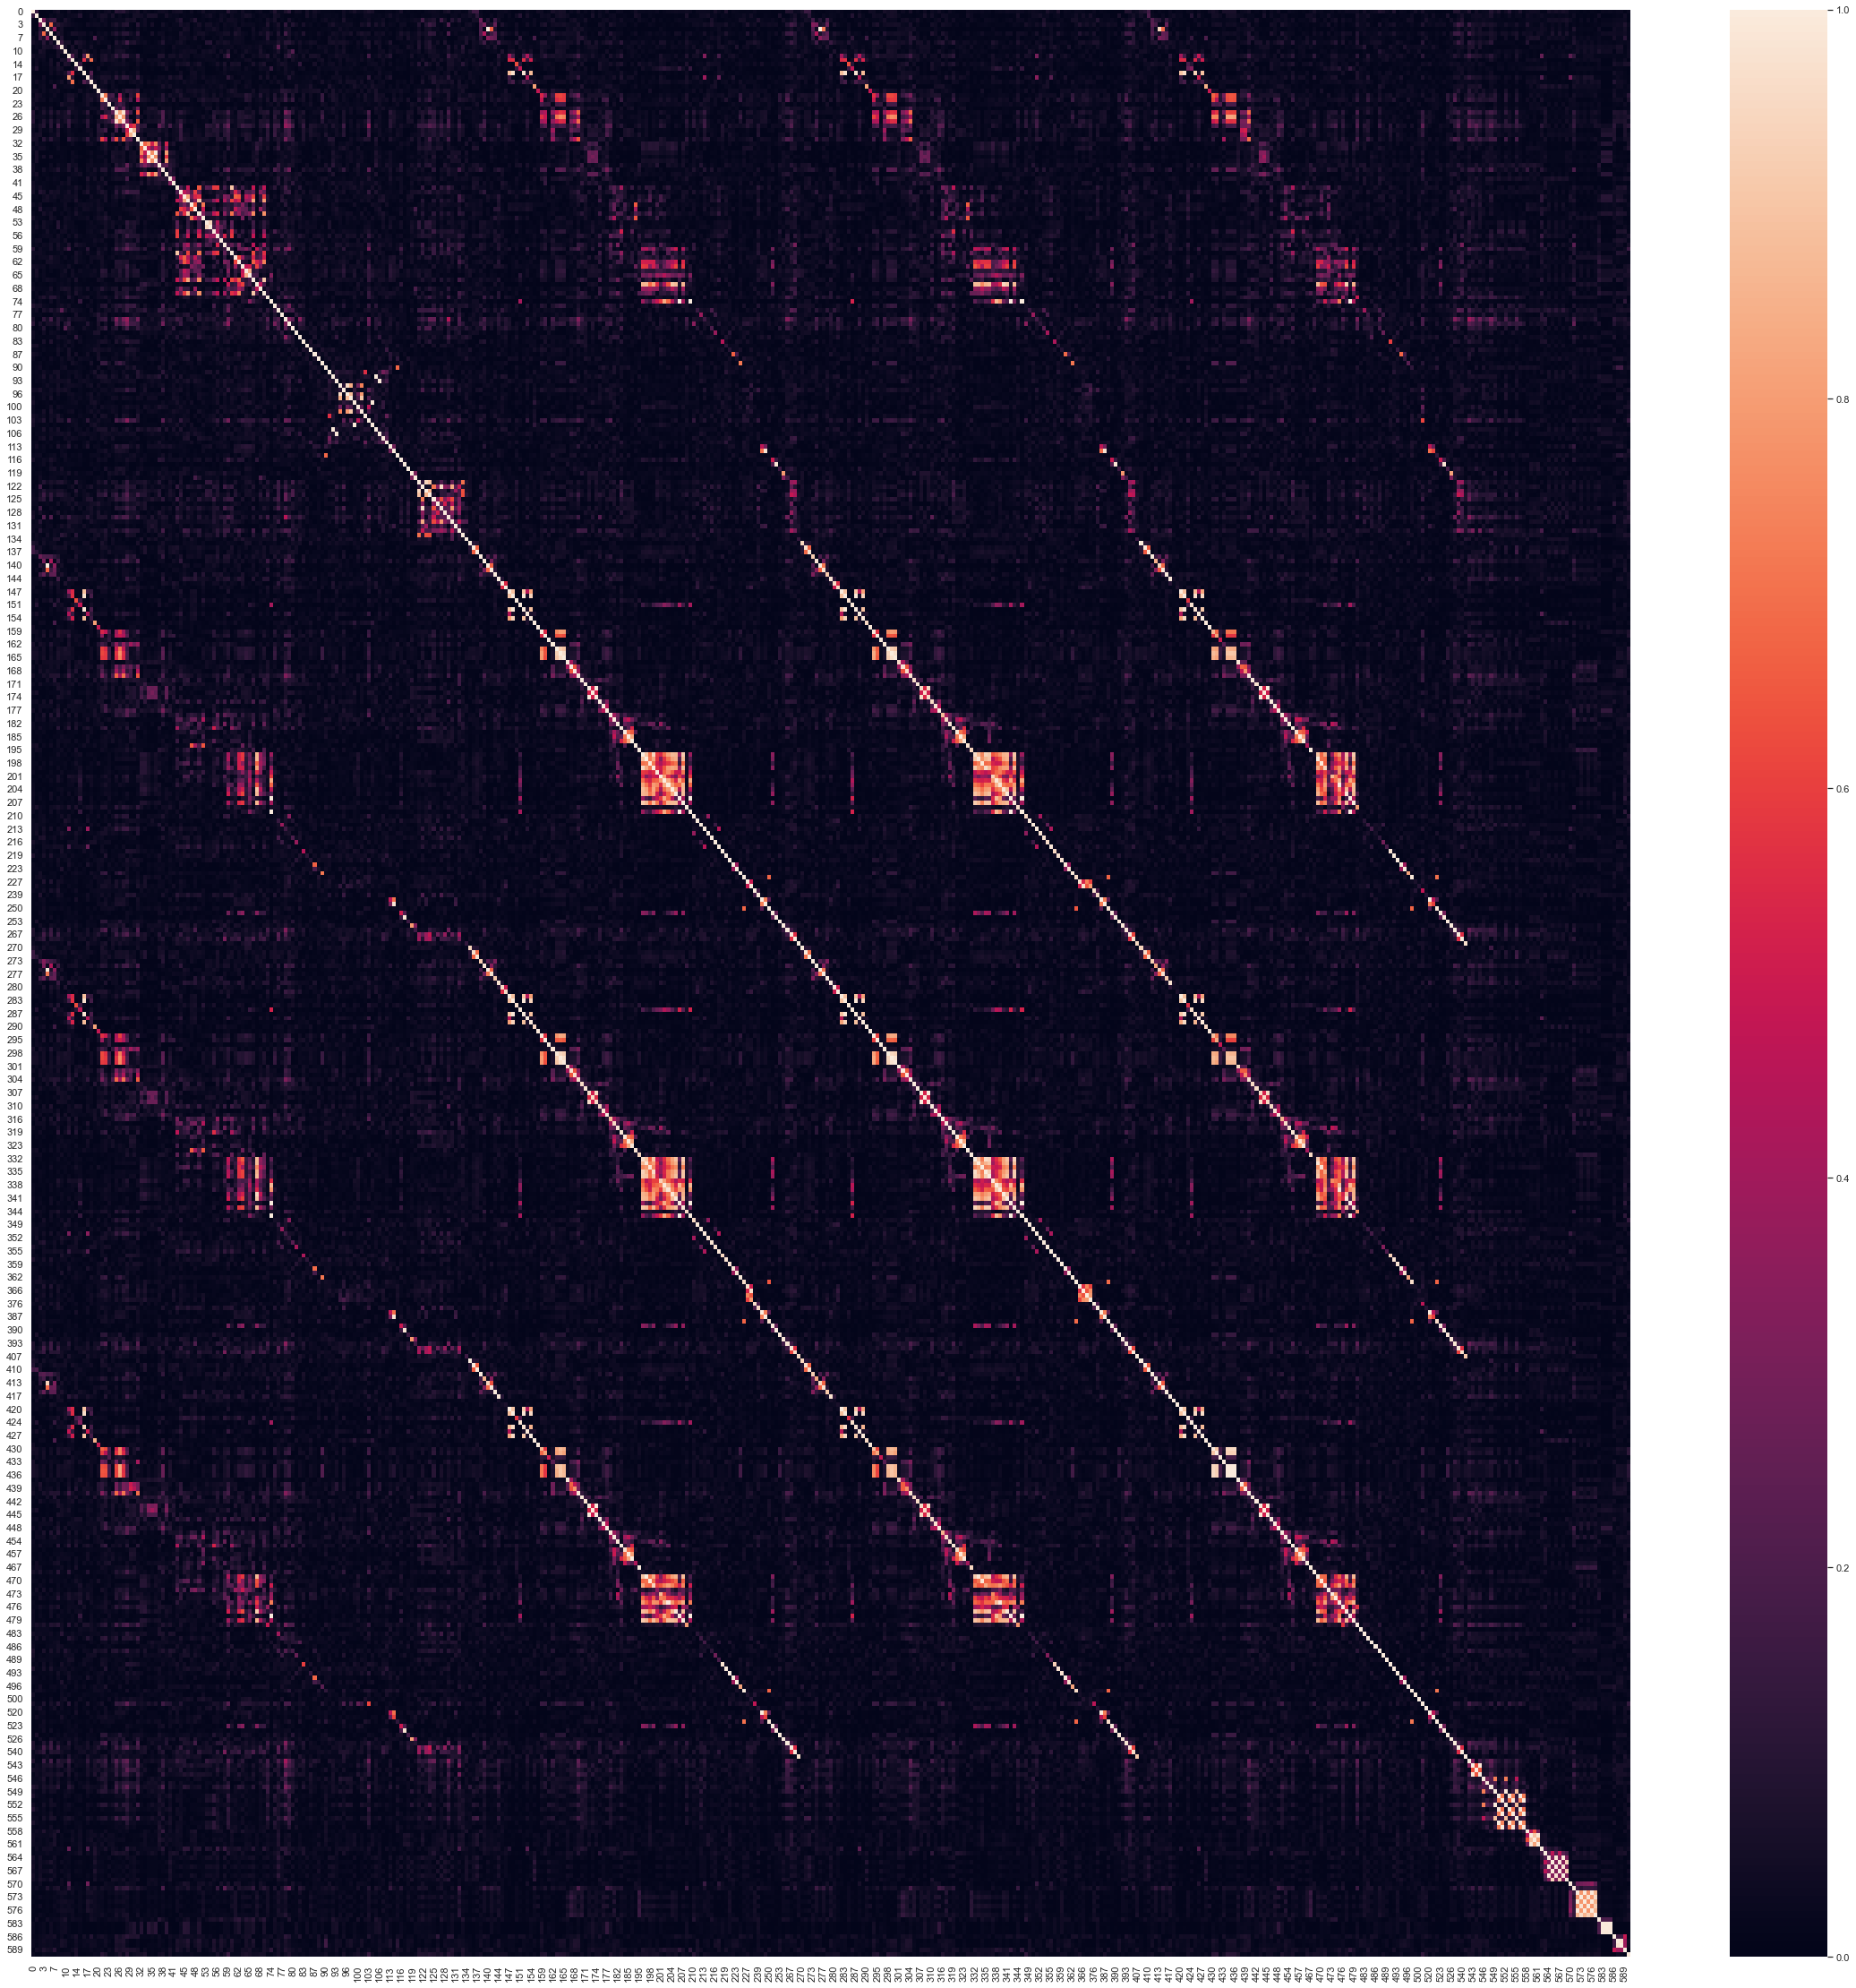

In [23]:
plt.figure(figsize = (40,40))
sns.heatmap(abs(signal_df3.corr()), vmin = 0, vmax = 1)
plt.show()

### Insights:
- Lighter shades in the above heat map represents high collinearity whereas darker shades represents less collinearity.
- Few variables show near 100% multi-collinearity

### Removing columns with high collinearity

In [24]:
# Let us get the highest correlation pairs
signal_corr = signal_df3.corr()**2
signal_upper = signal_corr.where(np.triu(np.ones(signal_corr.shape), k=1).astype(bool))
# Finding r2 > 0.70
high_corr_cols = [col for col in signal_upper.columns if any(signal_upper[col] >0.70)]
print(len(high_corr_cols))
print(high_corr_cols)

212
['27', '30', '36', '50', '54', '60', '65', '70', '96', '98', '101', '104', '105', '106', '123', '124', '127', '140', '147', '148', '152', '154', '164', '165', '174', '196', '197', '199', '203', '204', '205', '206', '207', '209', '249', '252', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '316', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '410', '411', '412', '413', '415', '416', '417', '420', '421', '424', '425', '426', '427', '428

In [25]:
print("Shape of signal dataframe BEFORE dropping highly correlated pairs of features :{}".format(signal_df3.shape))
signal_df4 = signal_df3.drop(signal_df3[high_corr_cols], axis=1)

print("Shape of signal dataframe AFTER dropping highly correlated pairs of features :{}".format(signal_df4.shape))

Shape of signal dataframe BEFORE dropping highly correlated pairs of features :(1567, 443)
Shape of signal dataframe AFTER dropping highly correlated pairs of features :(1567, 231)


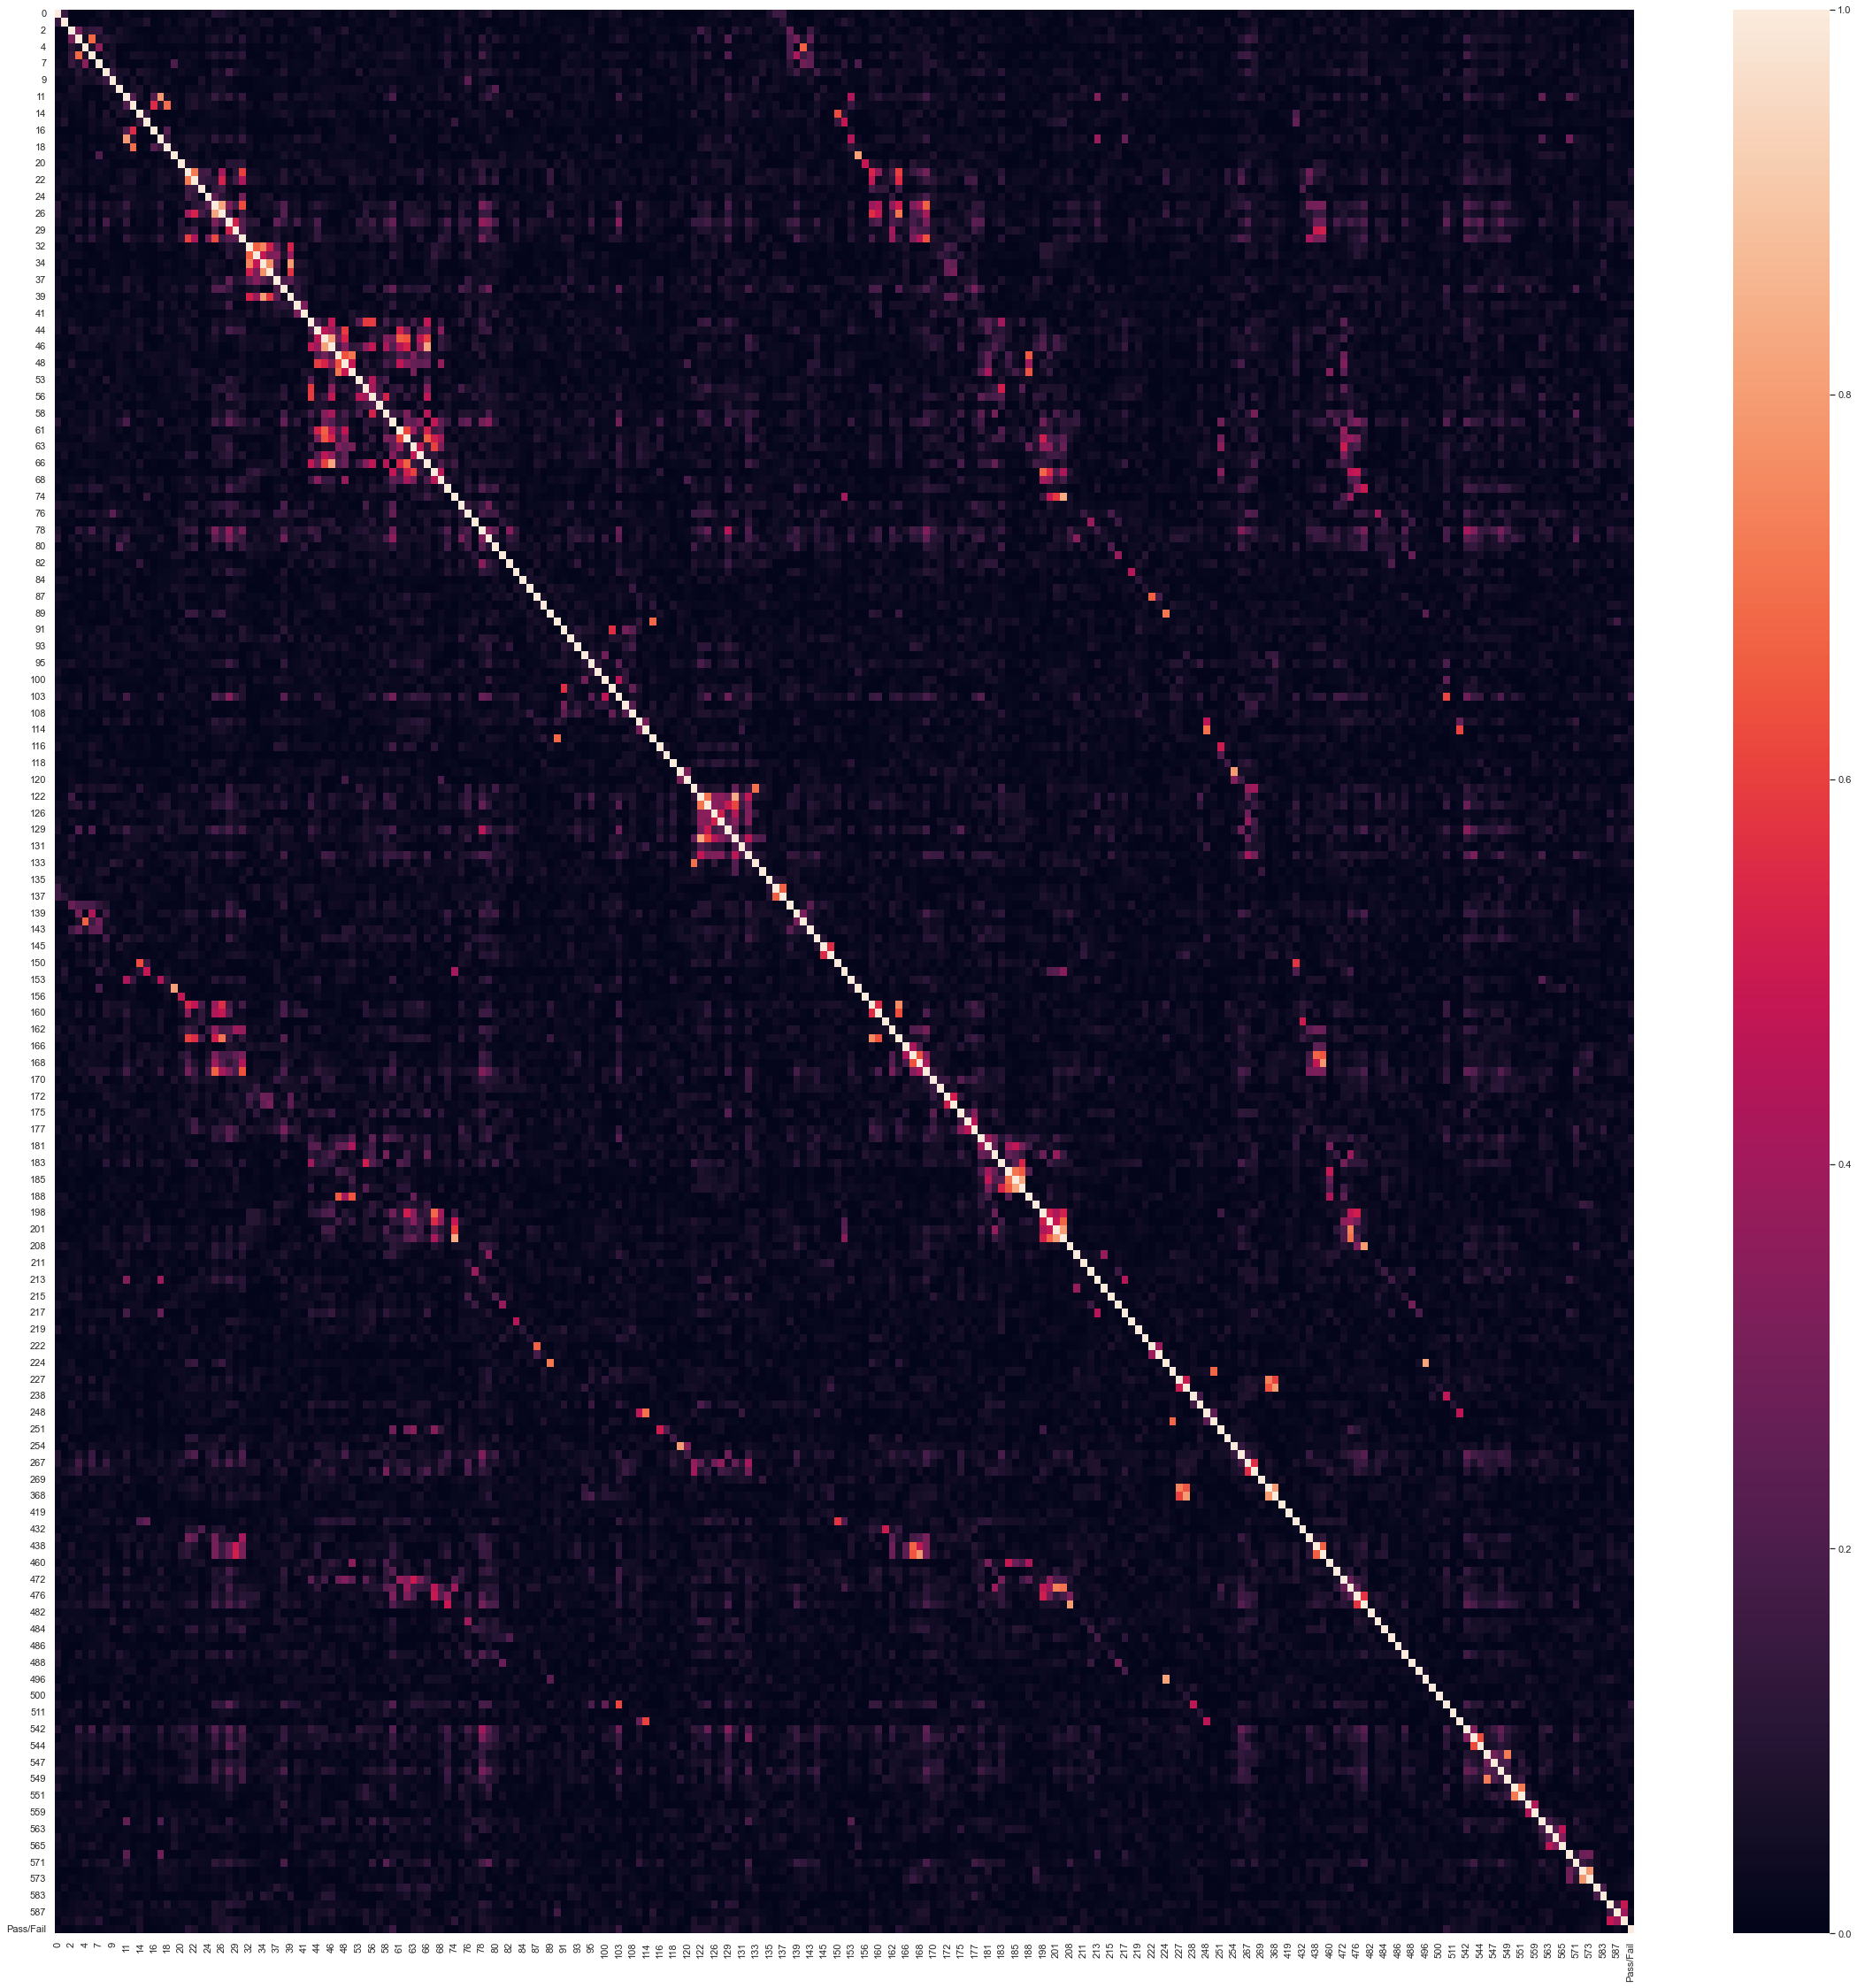

In [26]:
plt.figure(figsize = (40,40))
sns.heatmap(abs(signal_df4.corr()), vmin = 0, vmax = 1)
plt.show()

### Insights:
- Variables with high collinearity i.e with 70% or more correlation are removed.
- Heatmap clearly shows that lighter shades are removed 

## E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]

In [27]:
# Let us identify columns which have zero variance and remove those.
print(signal_df4.shape)
zero_var_cols=[]

for col in signal_df4.columns:
    if signal_df4[col].var() == 0:
        zero_var_cols.append(col)

print("Columns with zero variances : {}".format(zero_var_cols))

(1567, 231)
Columns with zero variances : []


There are no column with zero variance. Since we have removed columns with same values, we may not see any column with 0 variance or 0 STD.

In [28]:
# -1 for pass and 1 for fail is misleading. Let us mark all fails as 0 and pass as 1 for easy/conventional interpretation.
signal_df4["Pass/Fail"].replace(1,0, inplace=True)
signal_df4["Pass/Fail"].value_counts()

-1    1463
 0     104
Name: Pass/Fail, dtype: int64

In [29]:
signal_df4["Pass/Fail"].replace(-1,1, inplace=True)
signal_df4["Pass/Fail"].value_counts()

1    1463
0     104
Name: Pass/Fail, dtype: int64

### From here on, Pass will be tracked as 1 and Fail will be tracked as 0

In [30]:
signal_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 231 entries, 0 to Pass/Fail
dtypes: float64(230), int64(1)
memory usage: 2.8 MB


In [31]:
signal_df4.describe()

0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            7            8            9           10  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.112908     0.121822     1.462862    -0.000841     0.000146  ...   
std       6.209271     0.008936     0.073849     0.015107     0.009296  ...   
min      82.131100     0.000000     1.191000    -0.053400    -0.034900  ...   
25%      97.937800     0.121100     1.411250    -0.010800    -0.005600  ...   
50%     101.492200     0.122400     1.461600    -0.001300     0.000400  ...   
75%     104.530000     0.123800     1.516850     0.008400     0.005900  ...   
max     129.252200     0.128600     1.656400     0.074900     0.053000  ...   

               570          571          572          573          582  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean    530.523623     2.101836    28.450165     0.345636     0.500096   
std      17.499736     0.275112    86.304681     0.248478     0.003403   
min     317.196400     0.980200     3.540000     0.066700     0.477800   
25%     530.702700     1.982900     7.500000     0.242250     0.497900   
50%     532.398200     2.118600     8.650000     0.293400     0.500200   
75%     534.356400     2.290650    10.130000     0.366900     0.502350   
max     589.508200     2.739500   454.560000     2.196700     0.509800   

               583          586          587          589    Pass/Fail  
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  
mean      0.015318     0.021458     0.016475    99.670066     0.933631  
std       0.017174     0.012354     0.008805    93.861936     0.249005  
min       0.006000    -0.016900     0.003200     0.000000     0.000000  
25%       0.011600     0.013450     0.010600    44.368600     1.000000  
50%       0.013800     0.020500     0.014800    72.023000     1.000000  
75%       0.016500     0.027600     0.020300   114.749700     1.000000  
max       0.476600     0.102800     0.079900   737.304800     1.000000  

[8 rows x 231 columns]

In [32]:
# Identify columns which has same value for 98% of the rows and has extreme outliers. 
# These columns cannot contribute to the prediction and can affect the model accuracy.These columns can be removed.

extreme_outlier_cols=[]

for cols in signal_df4.columns[:-1]:
    val_cnt_dict=signal_df4[cols].value_counts().tolist()
    for cnt in val_cnt_dict:
        if cnt > (signal_df4["0"].count())*0.98:
            print(cols)
            extreme_outlier_cols.append(cols)

print("Coulmns with same data for 98% of the rows and has extreme outliers :{}".format(extreme_outlier_cols))

74
114
521
Coulmns with same data for 98% of the rows and has extreme outliers :['74', '114', '521']


In [33]:
signal_final=signal_df4.drop(extreme_outlier_cols,axis=1)
signal_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 228 entries, 0 to Pass/Fail
dtypes: float64(227), int64(1)
memory usage: 2.7 MB


### Data cleansing Summary:
- Removed all features which have 20% or more null values
- Updated rest of teh null values with Mean value of the feature
- Removed all highly correlated variables
- Removed all features with same value for all rows
- Verified if there are features with values sames as other feature. If found will be removed.
- Verified if there are features with 0 variance and 0 standard deviation. If found will be removed.
- Removed features which has same data for 98% of the rows and had extreme outliers.
- Time column is removed
- Target feature Pass/Fail values are converted as 0 for Fail and 1 for Pass.
- PCA can be performed for further dimensionality reduction. This is covered in section 

# 3. Data analysis & visualisation: [5 Marks]
## A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]

<AxesSubplot:xlabel='Pass/Fail', ylabel='Count'>

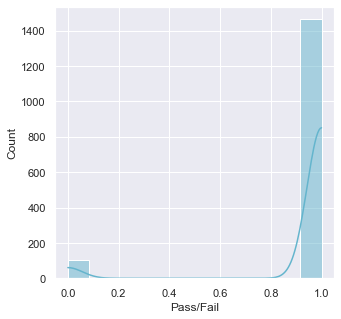

In [34]:
plt.figure(figsize=(5,5))
sns.histplot(data=signal_final,x="Pass/Fail",kde=True,color="c")

Number of Pass cases are way higherthan number of Fail case. We need to handle the imbalance in data later in this exercise.

<AxesSubplot:title={'center':'Distribution of Pass/Fail'}, ylabel='Pass/Fail'>

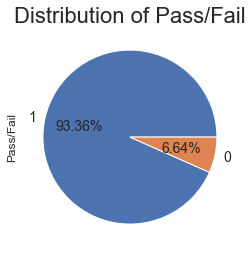

In [35]:
plt.title("Distribution of Pass/Fail", fontsize=22)
col_value_counts=signal_final["Pass/Fail"].value_counts()
col_value_counts.plot.pie(autopct="%.2f%%",textprops={'fontsize': 14})

#### Let us now see the distribution of all features individually

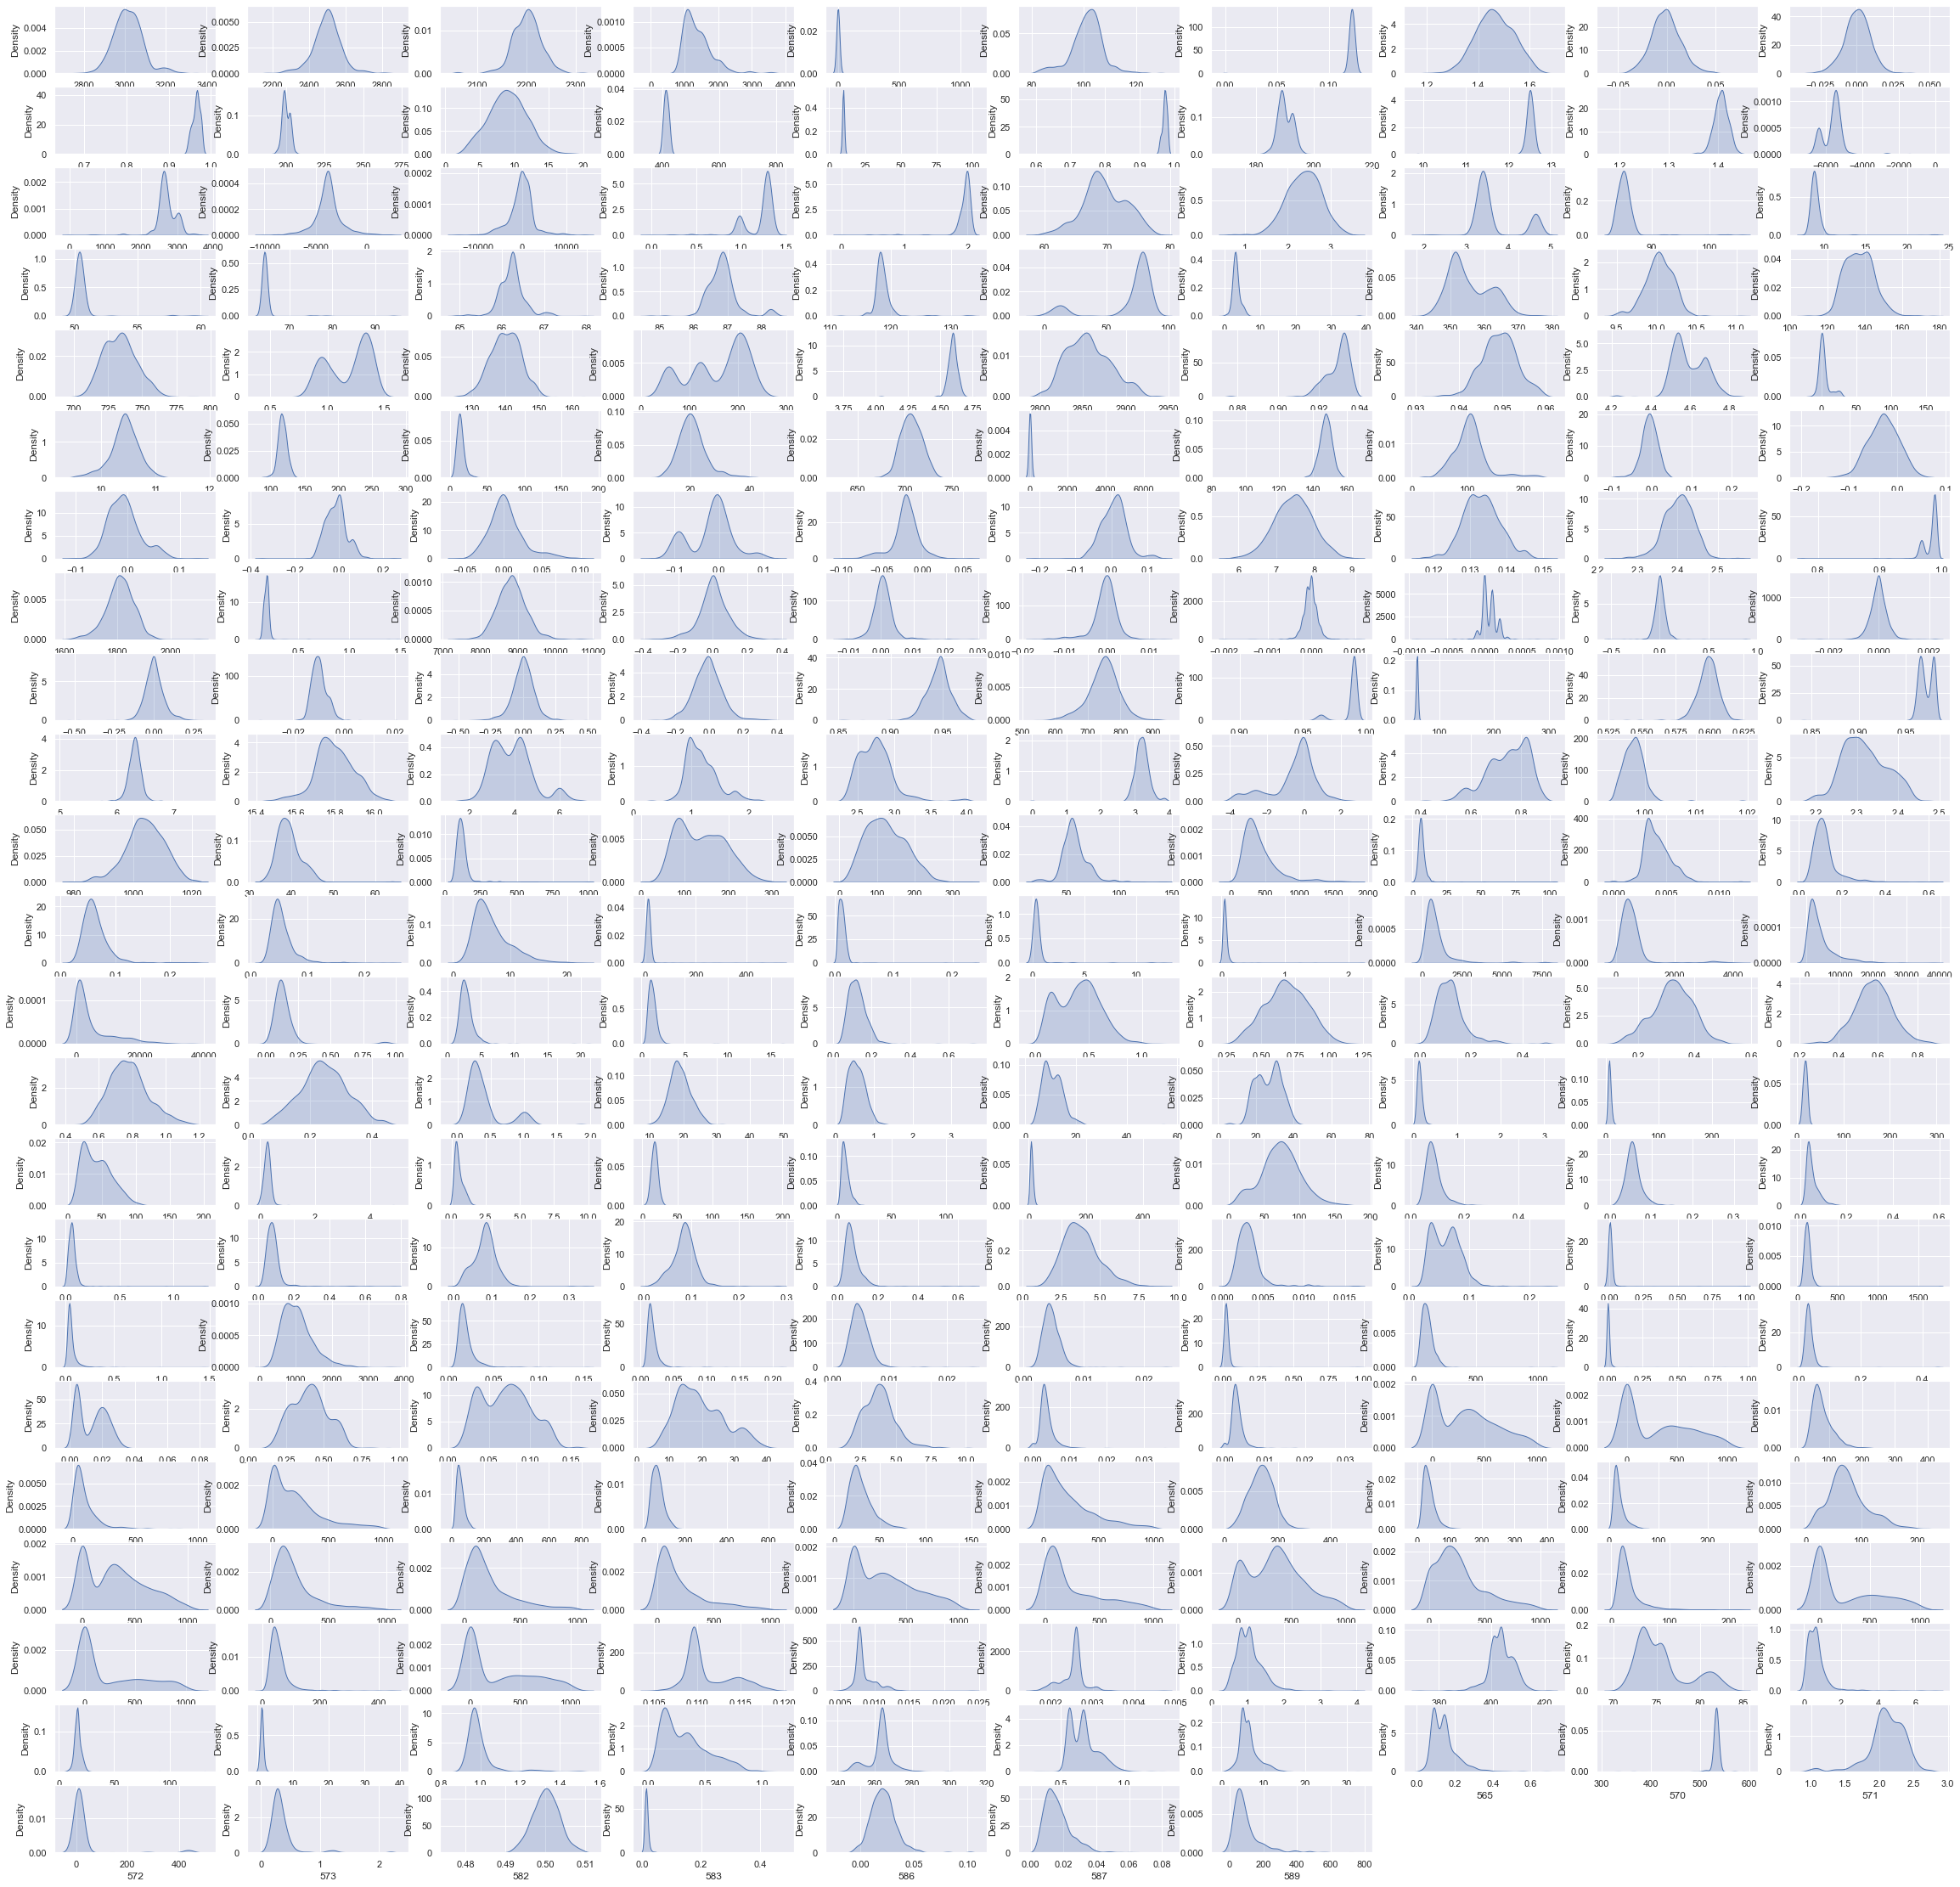

In [36]:
plt.figure(figsize=(40,40))
X=signal_final.drop(['Pass/Fail'],axis=1)
index = 1
for col in X.columns:
    plt.subplot(23,10,index)
    sns.kdeplot(data=X,x=col,fill=True,palette="crest")
    index += 1

#### Insights:
- Not all features are normally distributed. 
- There are outliers in the data.We can see both left/right skewed distribution
- Few features have multiple peaks 
- The units of data are not same across all features.Some features have values as low as  0 to 1 and some have values in thousands.

## B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]

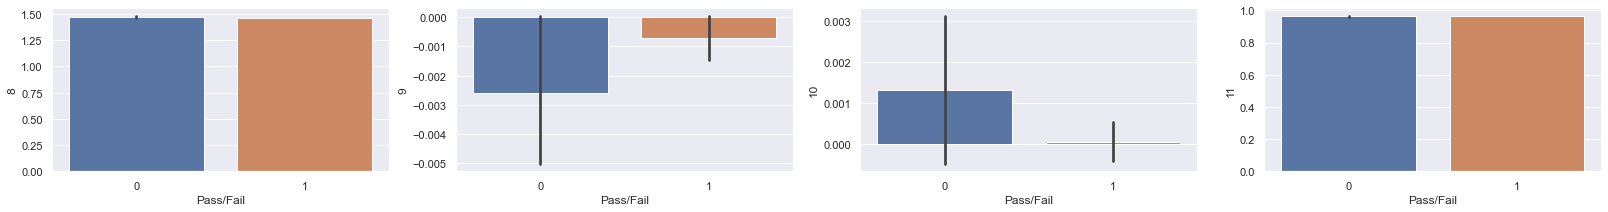

In [37]:
#barplot for all numerical fields against Pass/Fail.
# To have a closer look lets take some sample features
plt.figure(figsize=(35,3))
index = 1
for col in X.columns[7:11]:
    plt.subplot(1,5,index)
    sns.barplot(x='Pass/Fail',y=col,data=signal_final)
    index += 1

#### Insights:
- Feature 8 and 11 values are distributed within same/simlar range for both Pass and Fail cases. 
- Feature 9 and 10 values have different distribution ranges for Pass and Fail cases.

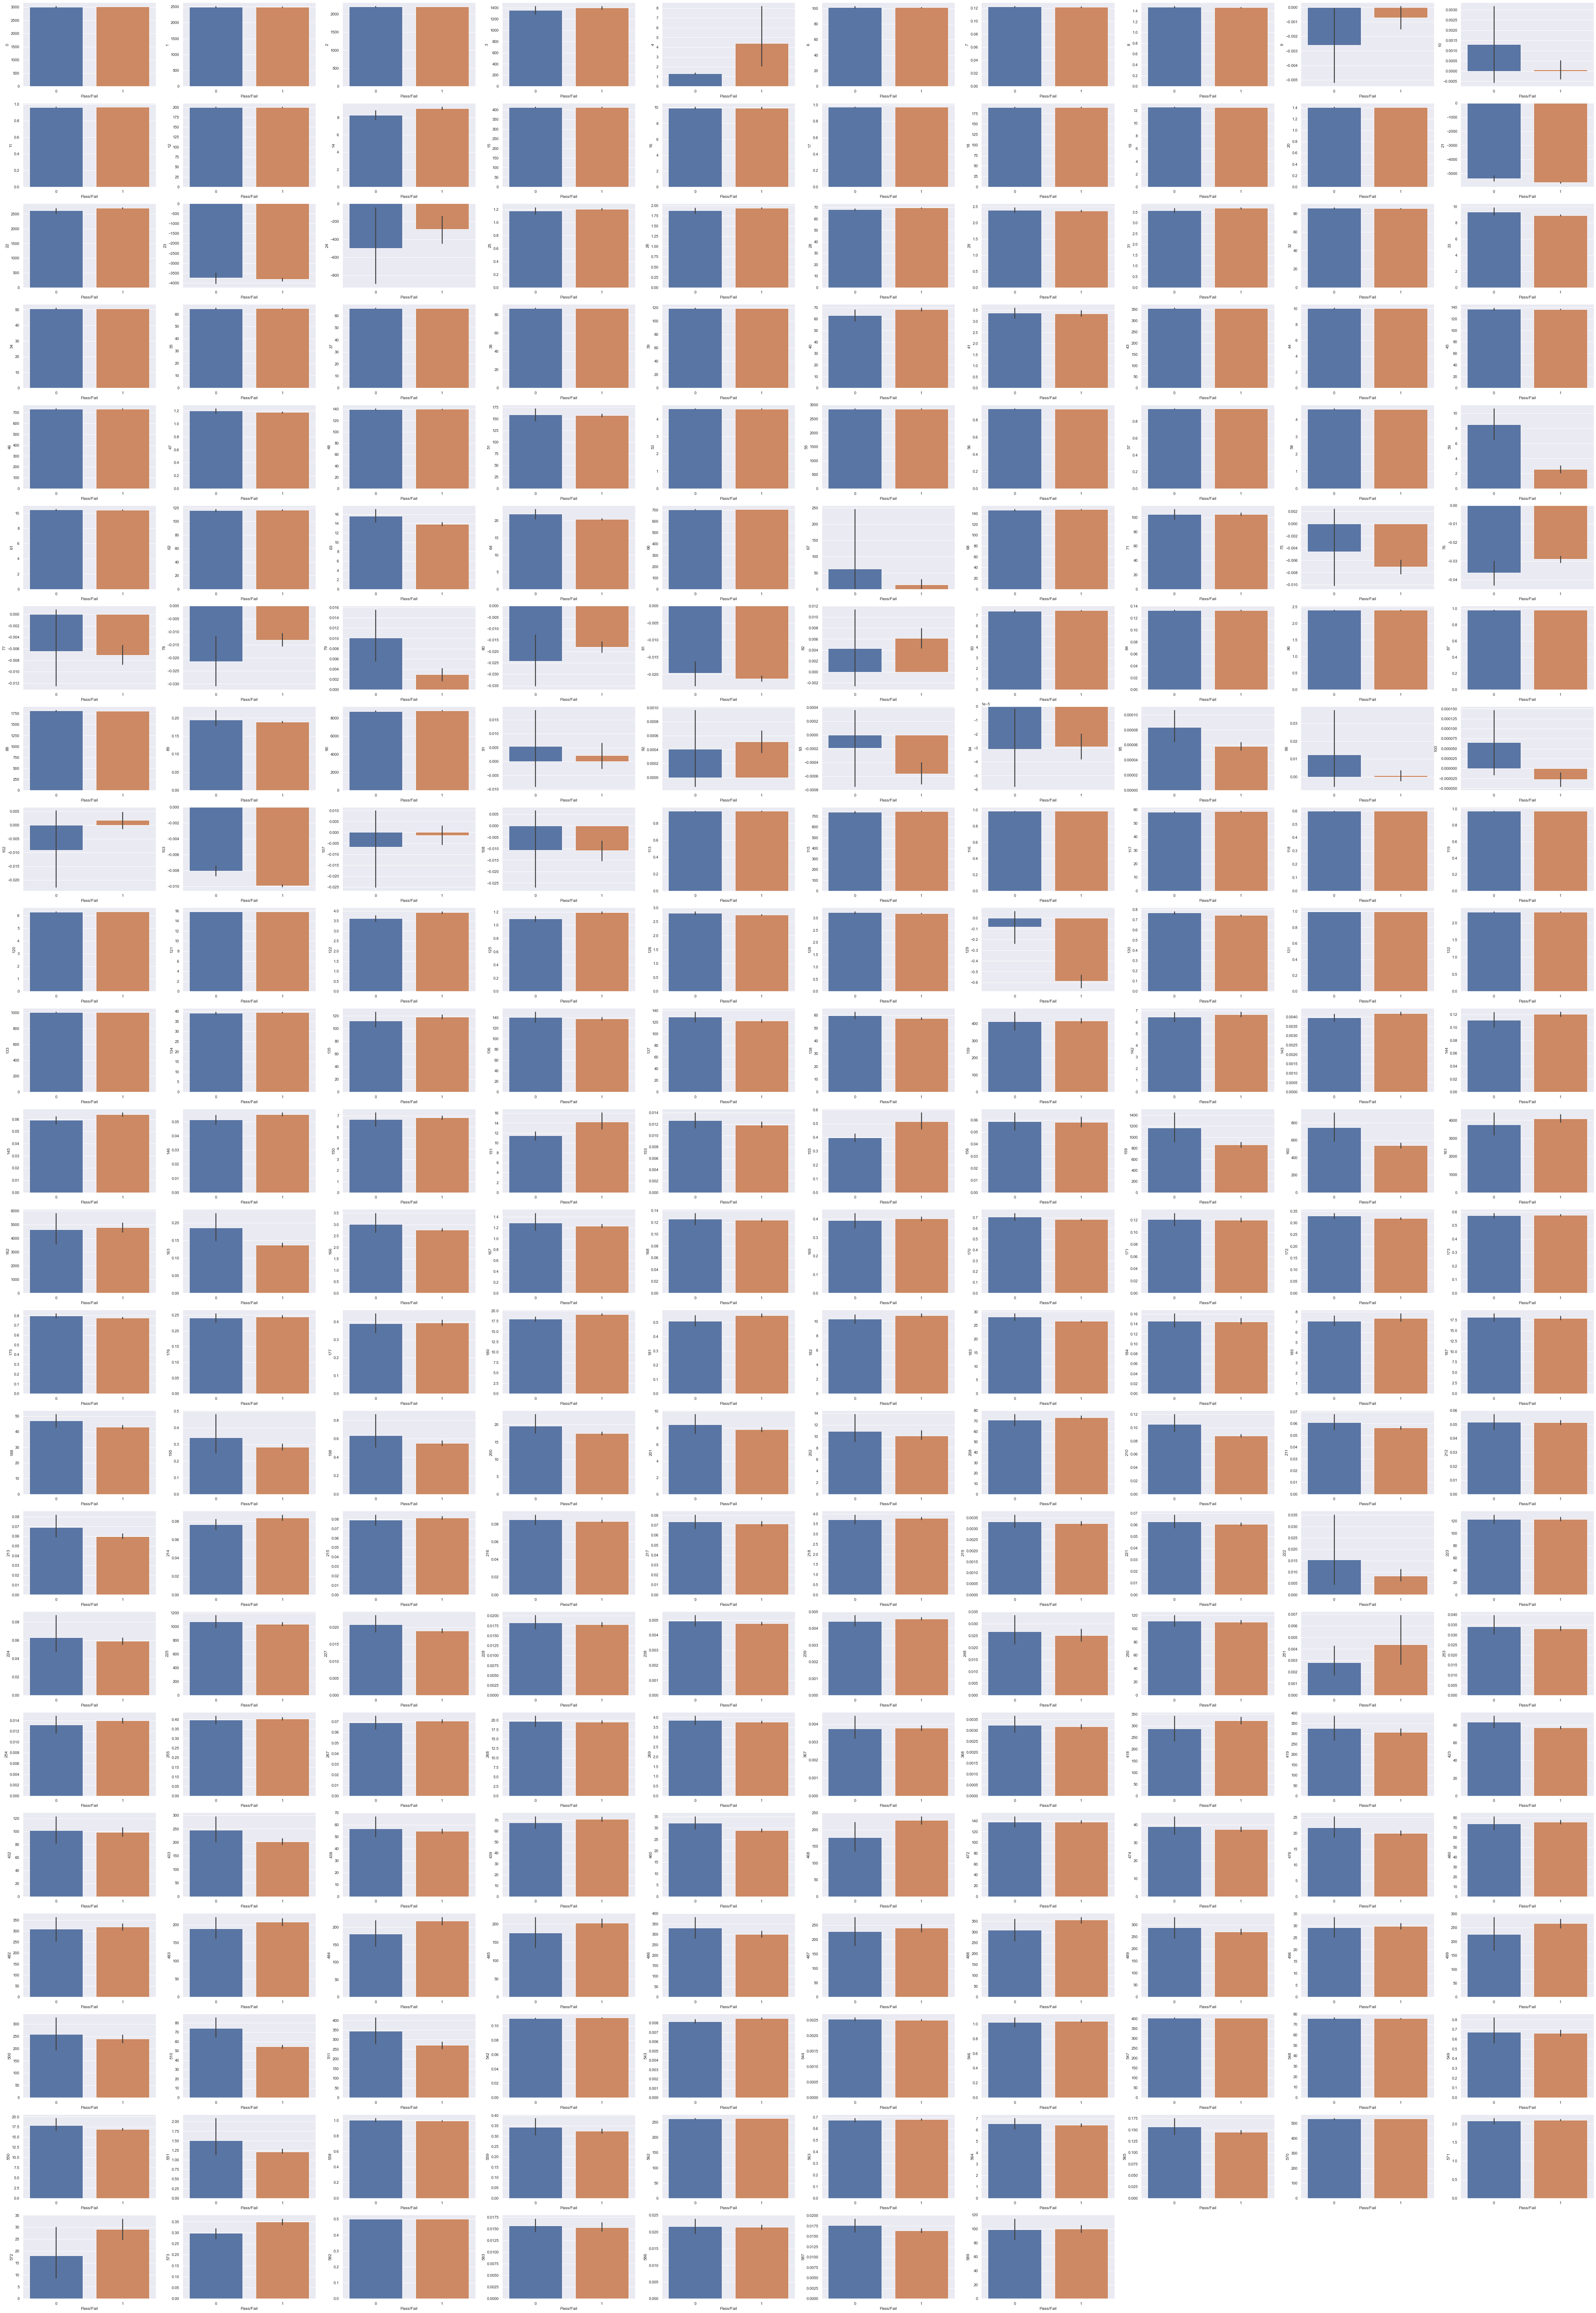

In [38]:
#barplot for all numerical fields
plt.figure(figsize=(80,120))
index = 1
for col in X.columns:
    plt.subplot(23,10,index)
    sns.barplot(x='Pass/Fail',y=col,data=signal_final)
    index += 1

#### Insights:
- Most of the features are distributed within same/similar range for both Pass and Fail cases. 

In [39]:
#Find correlation among the columns
X.corr()

0         1         2         3         4         6         7  \
0    1.000000 -0.143840  0.004756 -0.007613 -0.011014  0.002270  0.031483   
1   -0.143840  1.000000  0.005767 -0.007568 -0.001636 -0.025564 -0.012037   
2    0.004756  0.005767  1.000000  0.298935  0.095891 -0.136225 -0.146213   
3   -0.007613 -0.007568  0.298935  1.000000 -0.058483 -0.685835  0.073856   
4   -0.011014 -0.001636  0.095891 -0.058483  1.000000 -0.074368 -0.347734   
..        ...       ...       ...       ...       ...       ...       ...   
582  0.000224  0.043556 -0.006023  0.008988  0.045081 -0.022236 -0.029916   
583  0.023453  0.002904  0.015697  0.025436 -0.001300 -0.039398  0.010276   
586  0.018443 -0.009403 -0.025495  0.034711 -0.043929 -0.041209  0.058113   
587 -0.025880  0.017266 -0.029345 -0.039132 -0.031005  0.034027 -0.021426   
589  0.004174  0.044797 -0.032890 -0.080341  0.050910  0.043777 -0.107804   

            8         9        10  ...       565       570       571  \
0   -0.052622  0.009045  0.006504  ...  0.041290 -0.018953 -0.023166   
1    0.031258  0.023964  0.009645  ... -0.020536 -0.009000 -0.037932   
2    0.023528  0.016168  0.069893  ...  0.043956 -0.037070 -0.015600   
3   -0.102892  0.068215  0.049873  ...  0.030172  0.002231 -0.017820   
4   -0.025946  0.054206 -0.006470  ...  0.040886  0.005273 -0.081983   
..        ...       ...       ...  ...       ...       ...       ...   
582 -0.027611  0.046209 -0.073704  ... -0.009352 -0.042722  0.041564   
583  0.017390 -0.036036  0.039060  ...  0.042122  0.010110  0.006792   
586  0.010433  0.033738  0.000327  ...  0.028386  0.020544 -0.056391   
587  0.022845  0.059301  0.046965  ...  0.009609  0.008113 -0.010562   
589 -0.022770  0.004880  0.008393  ...  0.009927 -0.010583  0.010952   

          572       573       582       583       586       587       589  
0    0.013678 -0.002067  0.000224  0.023453  0.018443 -0.025880  0.004174  
1    0.001753 -0.011467  0.043556  0.002904 -0.009403  0.017266  0.044797  
2   -0.000518 -0.030674 -0.006023  0.015697 -0.025495 -0.029345 -0.032890  
3    0.007634  0.013163  0.008988  0.025436  0.034711 -0.039132 -0.080341  
4   -0.012024 -0.016533  0.045081 -0.001300 -0.043929 -0.031005  0.050910  
..        ...       ...       ...       ...       ...       ...       ...  
582  0.025136  0.039908  1.000000 -0.190090 -0.016726 -0.024473  0.041486  
583 -0.017368 -0.022666 -0.190090  1.000000  0.002257 -0.002649 -0.003008  
586 -0.008668 -0.013504 -0.016726  0.002257  1.000000  0.167913 -0.486559  
587 -0.001425 -0.018896 -0.024473 -0.002649  0.167913  1.000000  0.390813  
589 -0.022672 -0.027153  0.041486 -0.003008 -0.486559  0.390813  1.000000  

[227 rows x 227 columns]

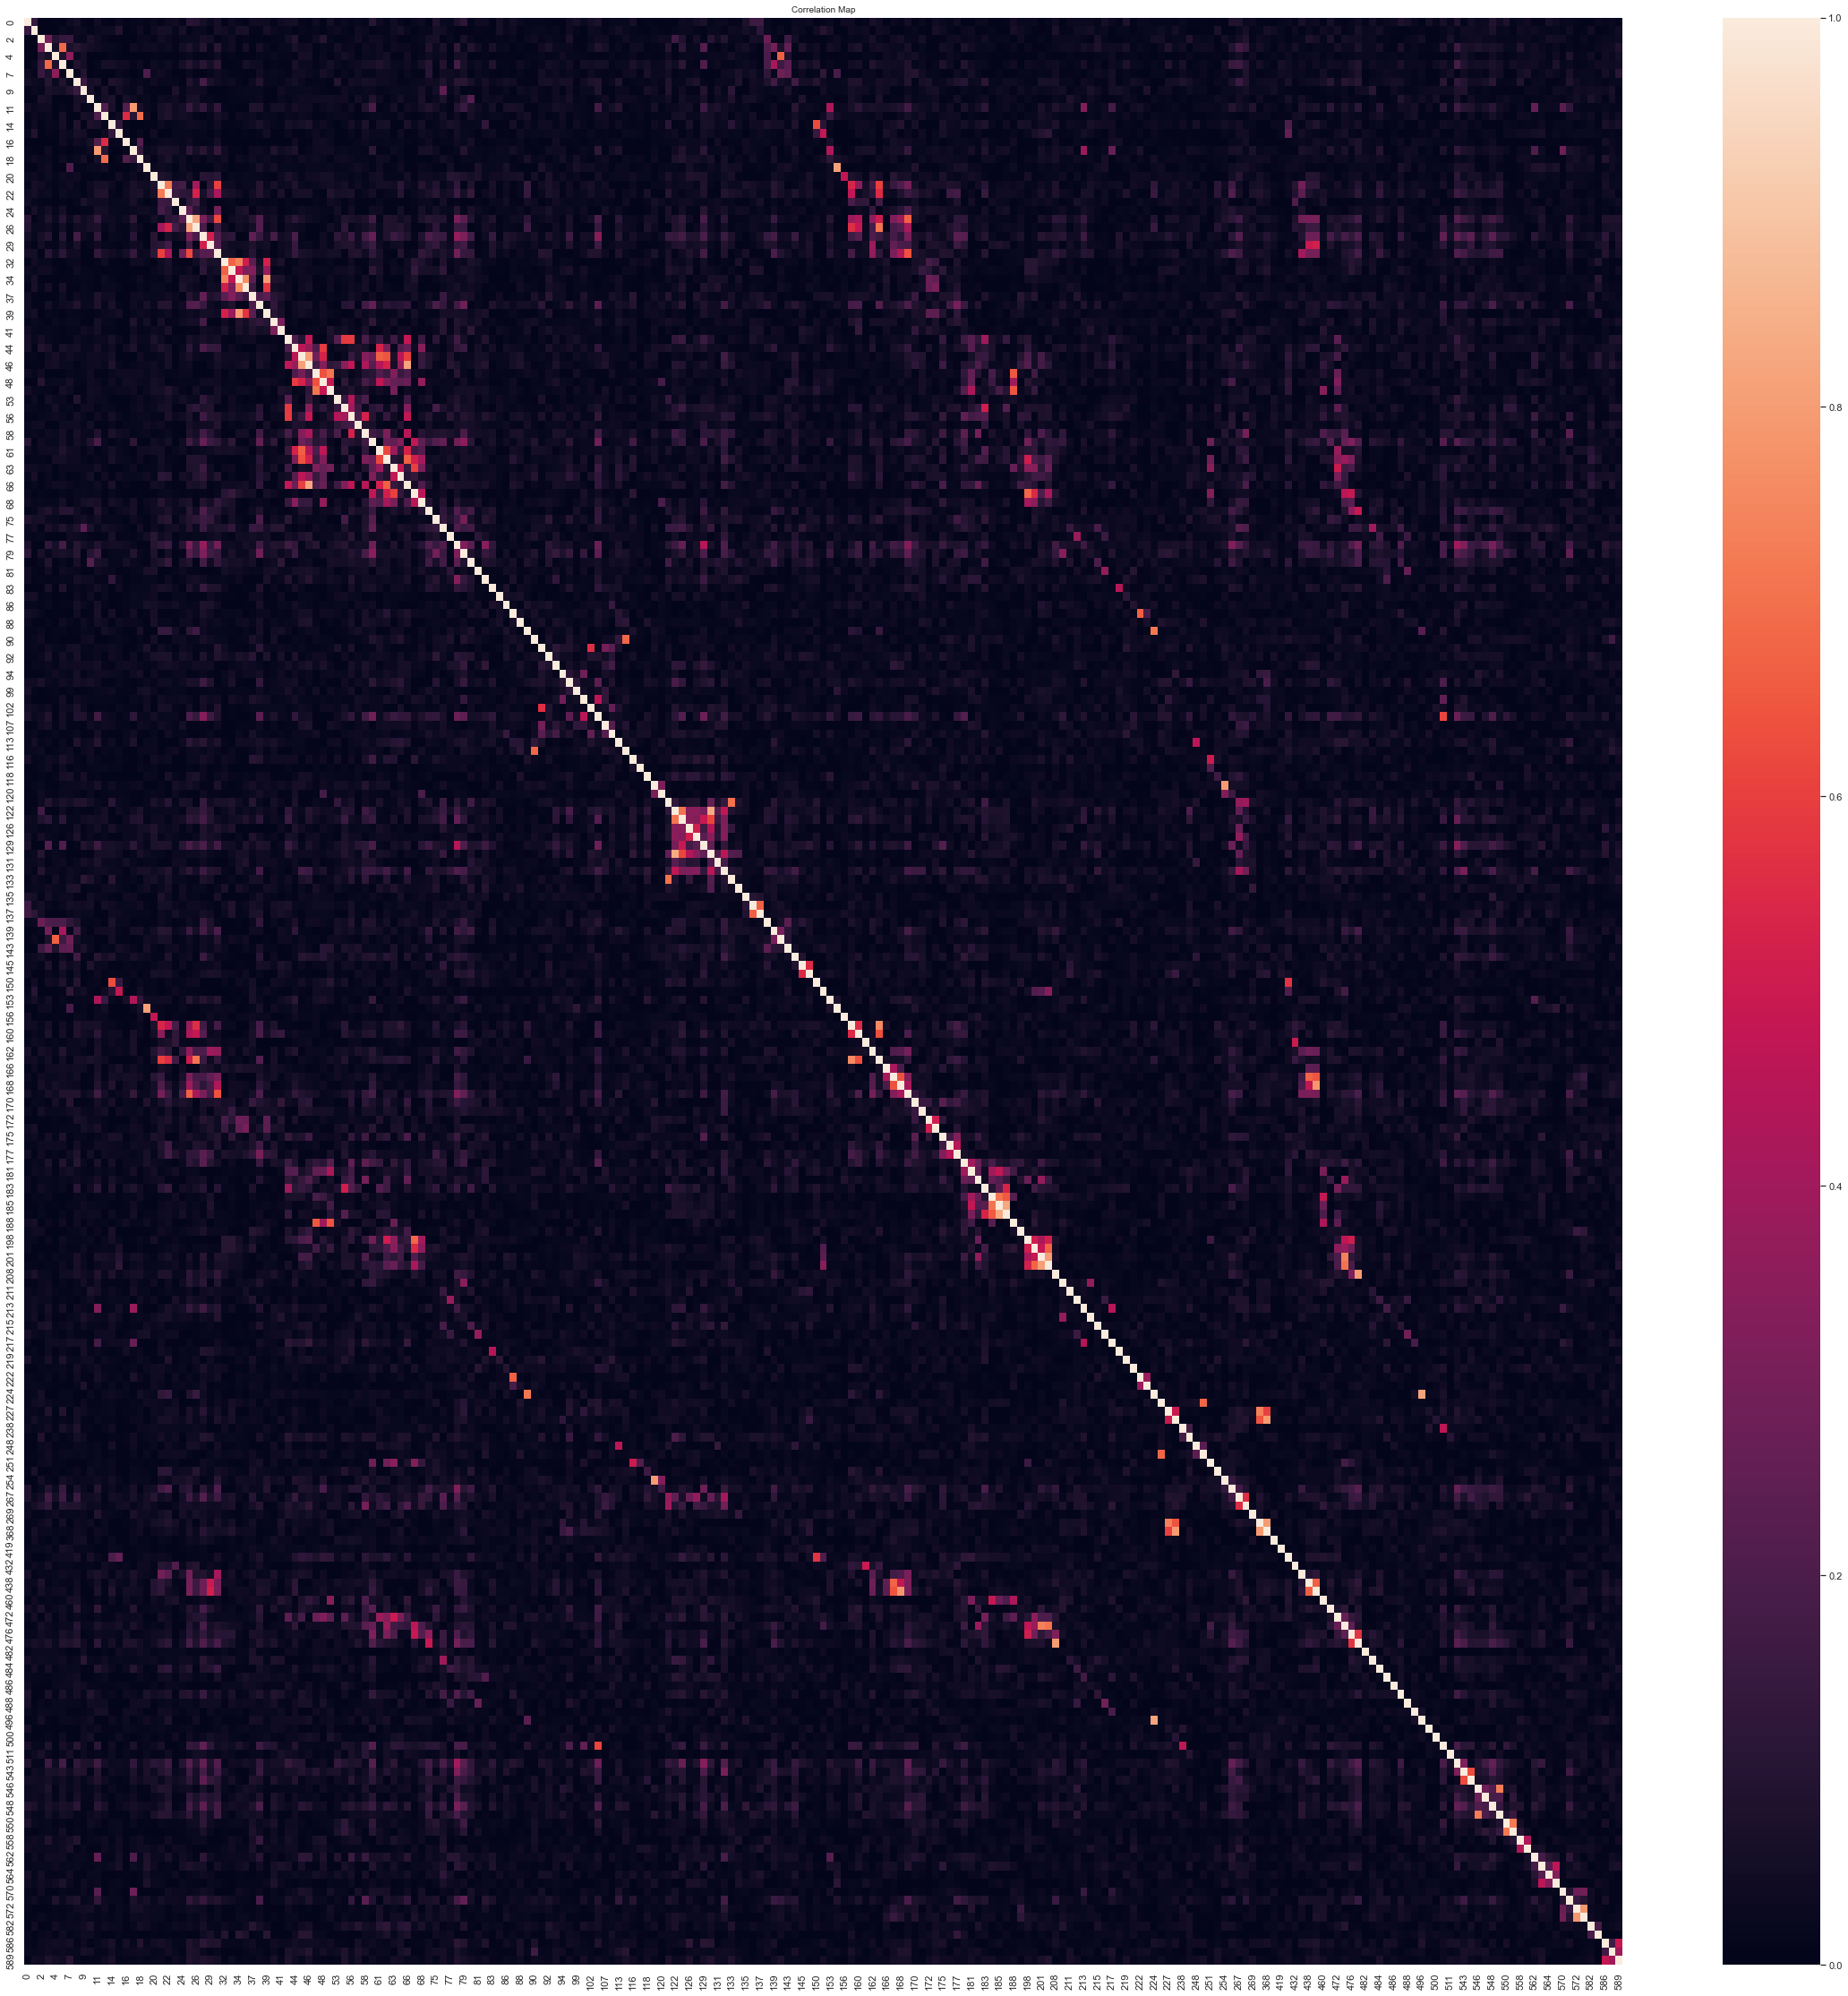

In [40]:
#correlation map
plt.figure(figsize = (40,40))
plt.title("Correlation Map", size=10)
sns.heatmap(abs(X.corr()), vmin = 0, vmax = 1)
plt.show()

#### Insights:
- Lighter shades represent high collinearity and darker shades represent low collinearity between the features. 
- Compared to previous heatmap, the current heatmap shows all the features are independent and has low collinearity.

# 4. Data pre-processing: [10 Marks]
## A. Segregate predictors vs target attributes. [2 Marks]

In [41]:
# Predictor variables
X = signal_final.drop(['Pass/Fail'], axis=1)
# Target variable
y = signal_final[['Pass/Fail']]

In [42]:
X.shape

(1567, 227)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 227 entries, 0 to 589
dtypes: float64(227)
memory usage: 2.7 MB


In [44]:
X.head()

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...      565       570     571    572     573     582  \
0  0.0162 -0.0034  ...  0.14561  533.8500  2.1113   8.95  0.3157  0.5005   
1 -0.0005 -0.0148  ...  0.14561  535.0164  2.4335   5.92  0.2653  0.5019   
2  0.0041  0.0013  ...  0.62190  535.0245  2.0293  11.21  0.1882  0.4958   
3 -0.0124 -0.0033  ...  0.16300  530.5682  2.0253   9.33  0.1738  0.4990   
4 -0.0031 -0.0072  ...  0.14561  532.0155  2.0275   8.83  0.2224  0.4800   

      583       586       587         589  
0  0.0118  0.021458  0.016475   99.670066  
1  0.0223  0.009600  0.020100  208.204500  
2  0.0157  0.058400  0.048400   82.860200  
3  0.0103  0.020200  0.014900   73.843200  
4  0.4766  0.020200  0.014900   73.843200  

[5 rows x 227 columns]

In [45]:
y.shape

(1567, 1)

In [46]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Pass/Fail  1567 non-null   int64
dtypes: int64(1)
memory usage: 12.4 KB


In [47]:
y.head()

Pass/Fail
0          1
1          1
2          0
3          1
4          1

## B. Check for target balancing and fix it if found imbalanced. [3 Marks]

In [48]:
y.value_counts()

Pass/Fail
1            1463
0             104
dtype: int64

- On checking the value distribution for y, ~94% of data has the value 1 and ~6% of data has the value 0. 
- To correct the imbalance in the data we will use SMOTE(Synthetic Minority Oversampling TEchnique).

In [49]:
print("Before upsampling y value counts :{}".format(y.value_counts()))
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_res,y_res = sm.fit_resample(X, y)


print("After upsampling y value counts :{}".format(y_res.value_counts()))

print('After upsampling, the shape of X_res: {}'.format(X_res.shape))
print('After upsampling, the shape of y_res: {}'.format(y_res.shape))

Before upsampling y value counts :Pass/Fail
1            1463
0             104
dtype: int64
After upsampling y value counts :Pass/Fail
0            1463
1            1463
dtype: int64
After upsampling, the shape of X_res: (2926, 227)
After upsampling, the shape of y_res: (2926, 1)


In [50]:
X_res.shape

(2926, 227)

In [51]:
X_res.head()

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...      565       570     571    572     573     582  \
0  0.0162 -0.0034  ...  0.14561  533.8500  2.1113   8.95  0.3157  0.5005   
1 -0.0005 -0.0148  ...  0.14561  535.0164  2.4335   5.92  0.2653  0.5019   
2  0.0041  0.0013  ...  0.62190  535.0245  2.0293  11.21  0.1882  0.4958   
3 -0.0124 -0.0033  ...  0.16300  530.5682  2.0253   9.33  0.1738  0.4990   
4 -0.0031 -0.0072  ...  0.14561  532.0155  2.0275   8.83  0.2224  0.4800   

      583       586       587         589  
0  0.0118  0.021458  0.016475   99.670066  
1  0.0223  0.009600  0.020100  208.204500  
2  0.0157  0.058400  0.048400   82.860200  
3  0.0103  0.020200  0.014900   73.843200  
4  0.4766  0.020200  0.014900   73.843200  

[5 rows x 227 columns]

In [52]:
y_res.shape

(2926, 1)

In [53]:
y_res.head()

Pass/Fail
0          1
1          1
2          0
3          1
4          1

## C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]

In [54]:
X_res_scaled=X_res.apply(zscore)
X_res_scaled.describe().apply(lambda x: x.apply('{0:.8f}'.format))

0              1              2              3  \
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000   
mean      0.00000000     0.00000000     0.00000000    -0.00000000   
std       1.00017093     1.00017093     1.00017093     1.00017093   
min      -3.70553388    -4.67459115    -5.20568865    -3.71882201   
25%      -0.65277248    -0.55687217    -0.68898674    -0.72695240   
50%      -0.15230441     0.04782946    -0.03406904    -0.20988458   
75%       0.55036301     0.54613590     0.61115157     0.50846356   
max       4.83014906     4.88837619     4.29904375     6.28153308   

                   4              6              7              8  \
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000   
mean      0.00000000    -0.00000000     0.00000000     0.00000000   
std       1.00017093     1.00017093     1.00017093     1.00017093   
min      -0.05296879    -3.60103559   -18.42133832    -4.35317513   
25%      -0.04307611    -0.45401258    -0.14008499    -0.63881023   
50%      -0.03749978     0.03141637     0.03440044    -0.01900459   
75%      -0.03299536     0.51899873     0.23598132     0.67116577   
max      27.06844750     5.29225570     0.99211485     2.98411445   

                   9             10  ...            565            570  \
count  2926.00000000  2926.00000000  ...  2926.00000000  2926.00000000   
mean     -0.00000000     0.00000000  ...    -0.00000000     0.00000000   
std       1.00017093     1.00017093  ...     1.00017093     1.00017093   
min      -3.87111053    -4.12749970  ...    -1.70023184   -11.14894956   
25%      -0.59849874    -0.58860691  ...    -0.75092879     0.04686911   
50%      -0.01644628     0.07712539  ...    -0.10126175     0.12570685   
75%       0.55721031     0.63417155  ...     0.31047274     0.22296781   
max       5.75907510     6.13879323  ...     6.95326655     3.11354679   

                 571            572            573            582  \
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000   
mean     -0.00000000     0.00000000    -0.00000000    -0.00000000   
std       1.00017093     1.00017093     1.00017093     1.00017093   
min      -3.86443440    -0.28406076    -1.31291688    -6.92224829   
25%      -0.38448608    -0.22643027    -0.47597226    -0.63377708   
50%       0.15096468    -0.20998484    -0.17158256     0.04108325   
75%       0.68476138    -0.19067934     0.17854181     0.65459263   
max       2.22889536     6.16569256     9.51095706     2.89390189   

                 583            586            587            589  
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000  
mean      0.00000000    -0.00000000     0.00000000     0.00000000  
std       1.00017093     1.00017093     1.00017093     1.00017093  
min      -0.71576452    -3.46538861    -1.68756618    -1.20668988  
25%      -0.27704532    -0.63048603    -0.68967711    -0.59839182  
50%      -0.10816697    -0.07718680    -0.16417585    -0.27821941  
75%       0.10366492     0.53530100     0.47858327     0.22972524  
max      35.32381414     7.30948958     7.64634745     7.77462473  

[8 rows x 227 columns]

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X_res_scaled,y_res,test_size=0.20,random_state=1)

In [56]:
print("X_res shape :{}".format(X_res.shape))
print("y_res shape :{}".format(y_res.shape))
print("X_train shape :{}".format(X_train.shape))
print("X_test shape :{}".format(X_test.shape))
print("y_train shape :{}".format(y_train.shape))
print("y_test shape :{}".format(y_test.shape))

X_res shape :(2926, 227)
y_res shape :(2926, 1)
X_train shape :(2340, 227)
X_test shape :(586, 227)
y_train shape :(2340, 1)
y_test shape :(586, 1)


In [57]:
X_train

0         1         2         3         4         6         7  \
2676  0.481511 -0.939733 -0.772559 -0.693143 -0.040157  0.540154  0.279433   
233  -0.710228 -0.221357  1.188954 -0.528715 -0.044707  0.249734 -0.426909   
817  -0.715100  0.110995 -2.440037 -0.369374 -0.040765 -0.320446  0.433563   
1984 -1.695782  0.767229  0.042873 -1.065775 -0.050434 -0.198795 -0.258895   
2567 -0.312342  0.373304  0.555073 -0.453286 -0.038193 -0.107749 -0.217623   
...        ...       ...       ...       ...       ...       ...       ...   
2763 -0.527597 -0.091045  0.295464  1.223679 -0.031713 -0.220732  0.274297   
905  -0.846941  0.435003  0.611980 -0.726707 -0.049175 -0.231100 -0.230661   
1096  0.743084 -0.050036  2.490975  1.773084 -0.029245 -1.200771 -0.064605   
235   0.505436 -0.064776 -0.091919 -0.361988 -0.050412 -0.243481 -0.260853   
1061  1.963899  1.758013  1.176093  1.680762 -0.037984 -1.407754  0.207123   

             8         9        10  ...       565       570       571  \
2676  0.563679 -1.002318  0.162751  ... -0.785165  0.050872 -1.428676   
233   0.330771 -0.268235 -0.483491  ... -0.852791  0.245600 -1.723647   
817  -0.501650  0.129582  0.158882  ... -0.296050  0.137895  0.507537   
1984 -1.199693  0.061816  0.628970  ...  0.741256  0.196456  0.835265   
2567  0.898191  0.003558  0.814167  ...  0.748621  0.070829  0.122265   
...        ...       ...       ...  ...       ...       ...       ...   
2763  0.071577  0.389696  0.051433  ...  1.167361  0.273982  0.994049   
905   0.020190  0.234666  0.462549  ... -0.636064 -0.184786  1.812929   
1096 -1.201641  0.534906 -0.693723  ... -0.135127  0.008433 -0.635070   
235  -0.652999 -2.437466 -0.238221  ... -0.101262  0.037145  0.349256   
1061 -0.739710  1.262987  1.046525  ... -0.852791 -0.086797 -0.352102   

           572       573       582       583       586       587       589  
2676 -0.211956 -0.440004 -1.662719 -0.163853  0.262060  0.383646 -0.032500  
233  -0.239158 -1.132011  0.623917 -0.018867 -2.250177 -0.945234  2.110853  
817  -0.175235  0.125693 -0.050943 -0.225638 -0.026789 -1.152114 -0.773371  
1984 -0.213867 -0.030149  2.321304  0.157264  1.246905  0.262004 -0.547721  
2567 -0.167584 -0.447927 -1.079368 -0.383154  0.267223 -1.422398 -0.908761  
...        ...       ...       ...       ...       ...       ...       ...  
2763 -0.184719  0.122421 -0.284378 -0.104019 -0.665869  0.053295  0.307507  
905  -0.197401 -0.500872  1.360128 -0.271588 -0.044792 -0.677508 -0.543101  
1096 -0.200404 -0.278805  0.531891 -0.325195 -0.332843 -1.115605 -0.669259  
235  -0.262753 -0.618258 -1.738094 -0.248613 -2.250177 -0.945234  2.110853  
1061 -0.205838 -0.404829  0.715944 -0.049499 -0.242827 -1.358993 -0.828763  

[2340 rows x 227 columns]

In [58]:
y_train

Pass/Fail
2676          0
233           1
817           1
1984          0
2567          0
...         ...
2763          0
905           1
1096          1
235           0
1061          1

[2340 rows x 1 columns]

In [59]:
X_test

0         1         2         3         4         6         7  \
1117 -0.359812  1.402160  0.225395  1.333763 -0.019386 -0.992750  0.388275   
192  -0.734591 -0.817504 -2.271219 -0.694940 -0.036207  0.196473  0.509043   
2190 -0.061852 -0.141564 -0.069419  0.358659 -0.038276 -0.280951  0.043517   
45   -1.343955 -0.676637 -1.253743 -1.277108 -0.043638  0.624689  0.010875   
2473 -0.056881  0.175839  1.058920  0.959156 -0.029711 -1.008056  0.004579   
...        ...       ...       ...       ...       ...       ...       ...   
1525 -0.440838  1.621318 -0.273180 -0.303974 -0.021023  0.637070  0.720387   
1517 -1.030432  1.119453 -0.760559  4.586570 -0.033421 -3.579218  0.418467   
1351 -1.373191  0.486594  0.455190  1.146933 -0.045662 -1.668621 -0.124989   
573   0.595233  1.130299 -2.204023 -0.390286 -0.045949 -0.542943  0.267507   
2671 -1.036076 -0.448877 -0.913467 -1.228530 -0.045517  0.402604 -0.063705   

             8         9        10  ...       565       570       571  \
1117  0.215683 -0.313271 -0.436773  ... -0.389489  0.132704  0.223877   
192  -1.310423 -0.988810  1.058205  ... -0.101262  0.053429  0.860814   
2190 -1.150814  0.789891 -0.323846  ... -0.230583  0.162466 -1.608412   
45    1.048104 -1.987107  0.532626  ... -0.325898 -0.083225  0.231497   
2473 -0.364250  0.522405  0.647728  ...  0.776236  0.217971  0.355761   
...        ...       ...       ...  ...       ...       ...       ...   
1525 -0.678224 -0.185669 -0.191503  ... -0.852791  0.223366 -1.756897   
1517 -2.514911  0.482364  0.462549  ... -0.852791  0.362539 -0.791274   
1351  0.551489 -0.673559 -0.425094  ... -0.289561 -0.818384 -0.796469   
573   0.395410  1.600756 -0.016311  ... -0.311623  0.336163 -0.595586   
2671  0.882491 -1.458196  0.465815  ... -0.267489  0.016972 -0.189702   

           572       573       582       583       586       587       589  
1117 -0.183243 -0.019642  0.869321  0.050057 -0.557882 -0.580153 -0.232916  
192  -0.205981  0.543911 -1.707419 -0.034183 -0.935948  0.247365  0.869786  
2190 -0.205348 -0.468820 -0.138986  0.302107  1.651011 -0.404013 -0.738456  
45   -0.210700  1.268552  0.439864 -0.286904 -0.710908 -0.190733  0.174327  
2473 -0.235612  0.175611  0.362754  0.173170 -0.779039  0.060672  1.240873  
...        ...       ...       ...       ...       ...       ...       ...  
1525 -0.257462 -0.615717 -0.020268  0.088348  1.323446 -0.434120 -0.753209  
1517 -0.227860 -0.523740 -0.357698  0.180247  0.396285 -0.421951 -0.571038  
1351  5.838929  4.736257 -0.909856 -0.286904 -2.484218 -1.127775  0.372269  
573  -0.206267  0.072844 -0.388373 -0.248613 -0.665901 -0.835710 -0.332342  
2671 -0.223156  0.716108 -0.381685 -0.286904 -0.350459  0.068738  0.072888  

[586 rows x 227 columns]

In [60]:
y_test

Pass/Fail
1117          1
192           1
2190          0
45            0
2473          0
...         ...
1525          1
1517          1
1351          1
573           1
2671          0

[586 rows x 1 columns]

## D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

In [61]:
# Let us take statistical report on train data
perc=[0.25,0.50,0.75]
X_train.describe(percentiles = perc).apply(lambda x: x.apply('{0:.8f}'.format))

0              1              2              3  \
count  2340.00000000  2340.00000000  2340.00000000  2340.00000000   
mean      0.01598395    -0.02859993    -0.00161940    -0.00375352   
std       1.01754471     1.00339585     1.00672512     0.99137833   
min      -3.70553388    -4.67459115    -5.20568865    -3.71882201   
25%      -0.64499536    -0.57835682    -0.69116656    -0.72726004   
50%      -0.13547819     0.03561968    -0.02886668    -0.21224776   
75%       0.57883989     0.51822977     0.59721209     0.50614997   
max       4.83014906     4.79131282     4.29904375     6.02499387   

                   4              6              7              8  \
count  2340.00000000  2340.00000000  2340.00000000  2340.00000000   
mean      0.00932203    -0.00361109    -0.00402516    -0.01042876   
std       1.11825955     0.98586694     1.04297662     0.99227063   
min      -0.05296879    -3.60103559   -18.42133832    -4.20340235   
25%      -0.04292326    -0.45558319    -0.13905559    -0.65643099   
50%      -0.03749978     0.03830827     0.03140561    -0.03420117   
75%      -0.03291523     0.52717291     0.23619525     0.66536762   
max      27.06844750     5.29225570     0.84115487     2.94470056   

                   9             10  ...            565            570  \
count  2340.00000000  2340.00000000  ...  2340.00000000  2340.00000000   
mean     -0.00512163    -0.00381383  ...    -0.00354607     0.00707158   
std       1.00612908     0.99570654  ...     0.99211831     0.95946761   
min      -3.87111053    -3.89390941  ...    -1.70023184   -10.55867645   
25%      -0.60160922    -0.61037323  ...    -0.74938255     0.04926203   
50%      -0.02163324     0.07025424  ...    -0.10126175     0.12859013   
75%       0.55144510     0.63475671  ...     0.32340312     0.22336642   
max       5.75907510     4.22335291  ...     6.95326655     2.97770018   

                 571            572            573            582  \
count  2340.00000000  2340.00000000  2340.00000000  2340.00000000   
mean      0.00202681    -0.01273436    -0.01498319    -0.00966881   
std       0.99651775     0.96748573     0.97095890     0.99709059   
min      -3.86443440    -0.28406076    -1.31291688    -6.92224829   
25%      -0.35210239    -0.22671627    -0.47960021    -0.63377708   
50%       0.15287543    -0.21033233    -0.16966706     0.02495817   
75%       0.68279673    -0.19207362     0.17627086     0.64677845   
max       2.22889536     6.16569256     9.51095706     2.89390189   

                 583            586            587            589  
count  2340.00000000  2340.00000000  2340.00000000  2340.00000000  
mean     -0.00543238     0.00788141     0.00687742     0.01432898  
std       0.82450181     1.01597206     0.99922558     1.02907654  
min      -0.71576452    -3.46538861    -1.68756618    -1.20668988  
25%      -0.27924346    -0.61334444    -0.68967711    -0.59832466  
50%      -0.10844960    -0.06942582    -0.15422491    -0.27945608  
75%       0.11132314     0.54163899     0.47858327     0.25214109  
max      34.92558675     7.30948958     7.64634745     7.77462473  

[8 rows x 227 columns]

In [62]:
# Let us take statistical report on test data
X_test.describe(percentiles = perc).apply(lambda x: x.apply('{0:.8f}'.format))

0             1             2             3             4  \
count  586.00000000  586.00000000  586.00000000  586.00000000  586.00000000   
mean    -0.06382668    0.11420450    0.00646654    0.01498844   -0.03722448   
std      0.92562820    0.97973504    0.97437552    1.03527006    0.00967887   
min     -2.68129648   -4.27243172   -5.20568865   -1.80484337   -0.05198995   
25%     -0.67475235   -0.46387627   -0.66907557   -0.71987541   -0.04350234   
50%     -0.18156956    0.13240990   -0.04585925   -0.18547579   -0.03750986   
75%      0.48563248    0.69164078    0.64409955    0.51330815   -0.03332146   
max      3.43161441    4.88837619    3.91838393    6.28153308    0.03263094   

                  6             7             8             9            10  \
count  586.00000000  586.00000000  586.00000000  586.00000000  586.00000000   
mean     0.01441971    0.01607318    0.04164385    0.02045154    0.01522927   
std      1.05611359    0.80749263    1.03092979    0.97659255    1.01852225   
min     -3.57921809  -18.42133832   -4.35317513   -3.40573913   -4.12749970   
25%     -0.45043350   -0.14008499   -0.58186066   -0.58987412   -0.53553648   
50%      0.02614428    0.04106698    0.02263777    0.03228114    0.08868921   
75%      0.50656474    0.23571549    0.71463545    0.56180835    0.62606256   
max      5.29225570    0.99211485    2.98411445    3.04190659    6.13879323   

       ...           565           570           571           572  \
count  ...  586.00000000  586.00000000  586.00000000  586.00000000   
mean   ...    0.01416007   -0.02823807   -0.00809342    0.05085050   
std    ...    1.03244653    1.14890030    1.01544787    1.12069444   
min    ...   -1.69763631  -11.14894956   -3.84884867   -0.26003614   
25%    ...   -0.75240533    0.02563671   -0.43202882   -0.22471420   
50%    ...   -0.10126175    0.11582755    0.13787737   -0.20761803   
75%    ...    0.25515709    0.21714123    0.70805091   -0.18770611   
max    ...    6.01543622    3.11354679    2.22889536    6.13680581   

                573           582           583           586           587  \
count  586.00000000  586.00000000  586.00000000  586.00000000  586.00000000   
mean     0.05983050    0.03860923    0.02169243   -0.03147185   -0.02746273   
std      1.10805795    1.01231571    1.51098283    0.93457813    1.00432287   
min     -1.31291688   -6.24738796   -0.63152411   -2.48421758   -1.52936425   
25%     -0.45920388   -0.57427826   -0.27158781   -0.66867310   -0.70984633   
50%     -0.17736880    0.10243418   -0.10613947   -0.10368072   -0.17856319   
75%      0.21004372    0.66768142    0.06537382    0.52107693    0.41841766   
max      9.51095706    2.89390189   35.32381414    5.23912869    6.45374831   

                589  
count  586.00000000  
mean    -0.05721809  
std      0.87374181  
min     -1.20668988  
25%     -0.59936263  
50%     -0.27797096  
75%      0.20124591  
max      5.84848332  

[8 rows x 227 columns]

In [63]:
# Let us take statistical report on Original data
X_res_scaled.describe(percentiles = perc).apply(lambda s: s.apply('{0:.8f}'.format))

0              1              2              3  \
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000   
mean      0.00000000     0.00000000     0.00000000    -0.00000000   
std       1.00017093     1.00017093     1.00017093     1.00017093   
min      -3.70553388    -4.67459115    -5.20568865    -3.71882201   
25%      -0.65277248    -0.55687217    -0.68898674    -0.72695240   
50%      -0.15230441     0.04782946    -0.03406904    -0.20988458   
75%       0.55036301     0.54613590     0.61115157     0.50846356   
max       4.83014906     4.88837619     4.29904375     6.28153308   

                   4              6              7              8  \
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000   
mean      0.00000000    -0.00000000     0.00000000     0.00000000   
std       1.00017093     1.00017093     1.00017093     1.00017093   
min      -0.05296879    -3.60103559   -18.42133832    -4.35317513   
25%      -0.04307611    -0.45401258    -0.14008499    -0.63881023   
50%      -0.03749978     0.03141637     0.03440044    -0.01900459   
75%      -0.03299536     0.51899873     0.23598132     0.67116577   
max      27.06844750     5.29225570     0.99211485     2.98411445   

                   9             10  ...            565            570  \
count  2926.00000000  2926.00000000  ...  2926.00000000  2926.00000000   
mean     -0.00000000     0.00000000  ...    -0.00000000     0.00000000   
std       1.00017093     1.00017093  ...     1.00017093     1.00017093   
min      -3.87111053    -4.12749970  ...    -1.70023184   -11.14894956   
25%      -0.59849874    -0.58860691  ...    -0.75092879     0.04686911   
50%      -0.01644628     0.07712539  ...    -0.10126175     0.12570685   
75%       0.55721031     0.63417155  ...     0.31047274     0.22296781   
max       5.75907510     6.13879323  ...     6.95326655     3.11354679   

                 571            572            573            582  \
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000   
mean     -0.00000000     0.00000000    -0.00000000    -0.00000000   
std       1.00017093     1.00017093     1.00017093     1.00017093   
min      -3.86443440    -0.28406076    -1.31291688    -6.92224829   
25%      -0.38448608    -0.22643027    -0.47597226    -0.63377708   
50%       0.15096468    -0.20998484    -0.17158256     0.04108325   
75%       0.68476138    -0.19067934     0.17854181     0.65459263   
max       2.22889536     6.16569256     9.51095706     2.89390189   

                 583            586            587            589  
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000  
mean      0.00000000    -0.00000000     0.00000000     0.00000000  
std       1.00017093     1.00017093     1.00017093     1.00017093  
min      -0.71576452    -3.46538861    -1.68756618    -1.20668988  
25%      -0.27704532    -0.63048603    -0.68967711    -0.59839182  
50%      -0.10816697    -0.07718680    -0.16417585    -0.27821941  
75%       0.10366492     0.53530100     0.47858327     0.22972524  
max      35.32381414     7.30948958     7.64634745     7.77462473  

[8 rows x 227 columns]

In [64]:
# Function to combine all three dataframe
# & introduce new column "df" to differentiate the records as train_df, test_df, original_df
# This combined df will help us compare the statistical characteristics on all three dataframes.
def combine_df(df1,df2,df3):
    df1_tmp=df1.copy()
    df2_tmp=df2.copy()
    df3_tmp=df3.copy()
    df1_tmp["df"]="original_df"
    df2_tmp["df"]="train_df"
    df3_tmp["df"]="test_df"
    combine_df = pd.concat([df1_tmp,df2_tmp,df3_tmp])
    print("combine_df.shape :{}".format(combine_df.shape))
    return combine_df

In [65]:
comb_df=combine_df(X_res_scaled, X_train, X_test)
comb_df

combine_df.shape :(5852, 228)


0         1         2         3         4         6         7  \
0     0.299670  0.960786 -0.461910  0.079726 -0.036443 -0.679039  0.327891   
1     1.202508 -0.413954  1.131710  0.221141 -0.049368  0.213667  0.403371   
2    -1.069135  0.904328 -0.511270  0.851995 -0.032791 -1.080190  0.312795   
3    -0.287975 -0.208703 -0.040070 -1.269792 -0.037412  0.571013 -0.049509   
4     0.317908  0.110717  1.241632 -0.148022 -0.032226 -0.153720  0.222219   
...        ...       ...       ...       ...       ...       ...       ...   
1525 -0.440838  1.621318 -0.273180 -0.303974 -0.021023  0.637070  0.720387   
1517 -1.030432  1.119453 -0.760559  4.586570 -0.033421 -3.579218  0.418467   
1351 -1.373191  0.486594  0.455190  1.146933 -0.045662 -1.668621 -0.124989   
573   0.595233  1.130299 -2.204023 -0.390286 -0.045949 -0.542943  0.267507   
2671 -1.036076 -0.448877 -0.913467 -1.228530 -0.045517  0.402604 -0.063705   

             8         9        10  ...       570       571       572  \
0     0.526264  1.353059 -0.448453  ...  0.198415  0.053127 -0.206696   
1     0.464779  0.099558 -1.779917  ...  0.259506  1.169065 -0.250026   
2    -0.370796  0.444834  0.100484  ...  0.259930 -0.230880 -0.174377   
3     0.332348 -0.793654 -0.436773  ...  0.026528 -0.244734 -0.201262   
4     0.567255 -0.095597 -0.892274  ...  0.102332 -0.237114 -0.208412   
...        ...       ...       ...  ...       ...       ...       ...   
1525 -0.678224 -0.185669 -0.191503  ...  0.223366 -1.756897 -0.257462   
1517 -2.514911  0.482364  0.462549  ...  0.362539 -0.791274 -0.227860   
1351  0.551489 -0.673559 -0.425094  ... -0.818384 -0.796469  5.838929   
573   0.395410  1.600756 -0.016311  ...  0.336163 -0.595586 -0.206267   
2671  0.882491 -1.458196  0.465815  ...  0.016972 -0.189702 -0.223156   

           573       582        583       586       587       589           df  
0    -0.047591  0.041083  -0.271588 -0.012528 -0.072093  0.007419  original_df  
1    -0.303705  0.470540   0.532525 -1.079973  0.369059  1.329507  original_df  
2    -0.695499 -1.400664   0.027083  3.312793  3.812993 -0.197347  original_df  
3    -0.768674 -0.419049  -0.386461 -0.125806 -0.263749 -0.307185  original_df  
4    -0.521707 -6.247388  35.323814 -0.125806 -0.263749 -0.307185  original_df  
...        ...       ...        ...       ...       ...       ...          ...  
1525 -0.615717 -0.020268   0.088348  1.323446 -0.434120 -0.753209      test_df  
1517 -0.523740 -0.357698   0.180247  0.396285 -0.421951 -0.571038      test_df  
1351  4.736257 -0.909856  -0.286904 -2.484218 -1.127775  0.372269      test_df  
573   0.072844 -0.388373  -0.248613 -0.665901 -0.835710 -0.332342      test_df  
2671  0.716108 -0.381685  -0.286904 -0.350459  0.068738  0.072888      test_df  

[5852 rows x 228 columns]

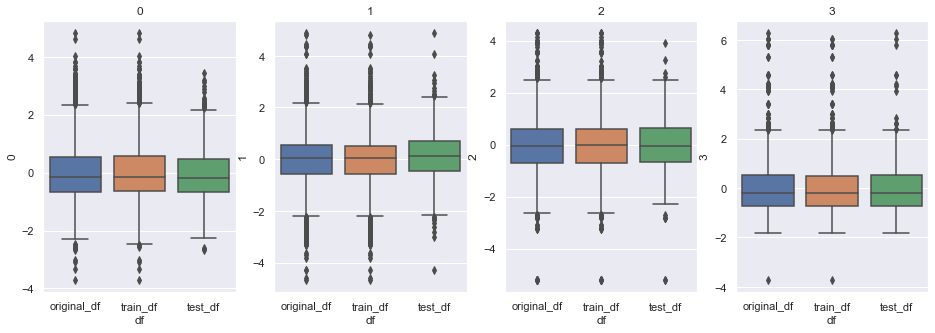

In [66]:
### Lets take sample of first 4 columns - 0,1,2,3 to have closer look on the statistical characteristics on train, test and orginal data 
plt.figure(figsize=(20,5))

index = 1
for col in comb_df.columns[0:4]:
    plt.subplot(1,5,index)
    plt.title(col)
    sns.boxplot(data=comb_df,y=col, x="df")
    index += 1

### Insight:
    - The box plots show similar data dataribution on all 4 columns.
    - The outliers also seem to be distributed in similar way across train, test and orginal data
    - Q1, Q2, Q3 all are similar across train, test and orginal data. 

In [67]:
### Lets us prepare box plots for all columns, categorized by train, test and original data
plt.figure(figsize=(60,400))

index = 1
for col in comb_df.columns[:-1]:
    plt.subplot(46,5,index)
    plt.title(col)
    sns.boxplot(data=comb_df,y=col, x="df")
    index += 1

### Insight:
    - The box plots show similar data dataribution on all columns.
    - The outliers also seem to be distributed in similar way across train, test and orginal data
    - Q1, Q2, Q3 all are similar across train, test and orginal data for all columns.

# 5. Model training, testing and tuning: [20 Marks]
## A. Use any Supervised Learning technique to train a model. [2 Marks]

#### Support Vector Classification model

In [68]:
svc_rbf = SVC(kernel="rbf",gamma=1,C=1) 
svc_rbf.fit(X_train, y_train.values.ravel())
y_predict_train = svc_rbf.predict(X_train)
y_predict_test = svc_rbf.predict(X_test)
print(" Train set accuracy: {:.6f}". format(svc_rbf.score( X_train, y_train.values.ravel())))
print(" Test set accuracy: {:.6f}". format(svc_rbf.score( X_test, y_test.values.ravel())))

 Train set accuracy: 1.000000
 Test set accuracy: 0.749147


#### Insight:
- Train score is 100% where as Test score is 74.91%. The model have overfit in training dataset. 

In [69]:
def get_confusion_matrix(y,y_pred):
    print("Confusion Matrix")
    cm_test=metrics.confusion_matrix(y, y_pred, labels=[0,1])

    df_cm_test = pd.DataFrame(cm_test, index = [i for i in ["Fail","Pass"]],
                      columns = [i for i in ["Fail","Pass"]])
    plt.figure(figsize = (4,3))
    sns.heatmap(df_cm_test, annot=True,fmt='g')

Confusion Matrix


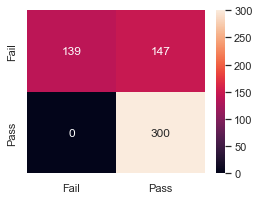

In [70]:
get_confusion_matrix(y_test,y_predict_test)

#### Insights on the confusion matrix

- Model correctly predicted 300 cases as Pass.
- Model correctly predicted 139 cases as Fail.
- Model incorrectly predicted 147 cases as Pass, where actually these are Fail.

In [71]:
print("classification  Matrix for SVC model :\n",classification_report(y_test,y_predict_test))

classification  Matrix for SVC model :
               precision    recall  f1-score   support

           0       1.00      0.49      0.65       286
           1       0.67      1.00      0.80       300

    accuracy                           0.75       586
   macro avg       0.84      0.74      0.73       586
weighted avg       0.83      0.75      0.73       586



#### Insights on Test data prediction:
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the case as Pass for 67% of the time.
<br>Model predicted correctly that the case as Fail for 100% the time.

By F1 score we can say that precison and recall is balanced for Pass by 80% and for fail by 65%
Overall Test accuracy is 75%

## B. Use cross validation techniques. [3 Marks]
Hint: Use all CV techniques that you have learnt in the course.

### Showing various CV techniques

### Using GridSearchCV

In [72]:
pipe_svc = Pipeline([('svc', SVC())]) 
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel':['poly','rbf']} 

svc_grid = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 5) 

svc_grid.fit( X_train, y_train.values.ravel()) 

print(" Best cross-validation accuracy: {:.6f}". format( svc_grid.best_score_)) 
print(" Best parameters: ", svc_grid.best_params_) 
print(" Train set accuracy: {:.6f}". format(svc_grid.score( X_train, y_train.values.ravel())))
print(" Test set accuracy: {:.6f}". format(svc_grid.score( X_test, y_test.values.ravel())))

 Best cross-validation accuracy: 0.997863
 Best parameters:  {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
 Train set accuracy: 1.000000
 Test set accuracy: 0.998294


### Using RandomizedSearchCV

In [74]:
from scipy import stats
svc_clf = SVC(kernel='rbf')
param = {"C": stats.uniform(2, 10),
        "gamma": stats.uniform(0.1, 1)}
svc_rand = RandomizedSearchCV(svc_clf, param_distributions = param, n_iter = 20, n_jobs = 4, cv = 3, random_state = 1) 

svc_result = svc_rand.fit(X_train,y_train.values.ravel())

print('Best Score: %s' % svc_result.best_score_)
print('Best Hyperparameters: %s' % svc_result.best_params_)
print(" Train set accuracy: {:.6f}". format( svc_result.score( X_train, y_train.values.ravel())))
print(" Test set accuracy: {:.6f}". format( svc_result.score( X_test, y_test.values.ravel())))

Best Score: 0.8585470085470086
Best Hyperparameters: {'C': 2.8504421136977793, 'gamma': 0.13905478323288237}
 Train set accuracy: 1.000000
 Test set accuracy: 0.897611


### Using cross_val_score

In [75]:
svc_clf = SVC(kernel='rbf')
svc_cross = cross_val_score(svc_clf, X_res_scaled,y_res.values.ravel(), cv=10)
print(svc_cross)
print("Accuracy: %.3f%% (%.3f%%)" % (svc_cross.mean()*100.0, svc_cross.std()*100.0))

[0.81228669 0.93174061 0.98634812 0.98976109 1.         1.
 1.         0.99657534 1.         1.        ]
Accuracy: 97.167% (5.672%)


## C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

In [76]:
# Using RandomizedSearchCV
from scipy import stats

svc_clf = SVC()
param = {"kernel" :["rbf"],
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "gamma": [0.001, 0.01, 0.1, 1, 10]}
               
svc_rand = RandomizedSearchCV(svc_clf, param_distributions = param, n_iter = 20, n_jobs = 4, cv = 3, random_state = 1) 

svc_result = svc_rand.fit(X_train,y_train.values.ravel())

print('Best Score: %s' % svc_result.best_score_)
print('Best Hyperparameters: %s' % svc_result.best_params_)
print("Train set accuracy: {:.6f}". format( svc_result.score( X_train, y_train.values.ravel())))
print("Test set accuracy: {:.6f}". format( svc_result.score
                                          ( X_test, y_test.values.ravel())))

Best Score: 0.9987179487179487
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
Train set accuracy: 1.000000
Test set accuracy: 0.998294


In [77]:
# manual validation
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x]==predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [78]:
def rbf_model(g,c):
    for gi in g:
        for ci in c:
            res={}
            clf_rbf = SVC(kernel="rbf", gamma=gi, C=ci) 
            clf_rbf.fit(X_train, y_train.values.ravel())
            y_pred = clf_rbf.predict(X_test)
            acc=getAccuracy(y_test["Pass/Fail"].tolist(),y_pred)
            res["g"]=gi
            res["c"]=ci
            res["acc"]=acc
            print(res) 


In [79]:
g=[0.001, 0.01, 0.1, 1, 10]
c=[0.001, 0.01, 0.1, 1, 10, 100]
rbf_model(g,c)

{'g': 0.001, 'c': 0.001, 'acc': 48.80546075085324}
{'g': 0.001, 'c': 0.01, 'acc': 48.80546075085324}
{'g': 0.001, 'c': 0.1, 'acc': 85.15358361774744}
{'g': 0.001, 'c': 1, 'acc': 93.85665529010238}
{'g': 0.001, 'c': 10, 'acc': 98.46416382252559}
{'g': 0.001, 'c': 100, 'acc': 98.97610921501706}
{'g': 0.01, 'c': 0.001, 'acc': 48.80546075085324}
{'g': 0.01, 'c': 0.01, 'acc': 48.80546075085324}
{'g': 0.01, 'c': 0.1, 'acc': 93.34470989761093}
{'g': 0.01, 'c': 1, 'acc': 99.82935153583618}
{'g': 0.01, 'c': 10, 'acc': 99.82935153583618}
{'g': 0.01, 'c': 100, 'acc': 99.82935153583618}
{'g': 0.1, 'c': 0.001, 'acc': 48.80546075085324}
{'g': 0.1, 'c': 0.01, 'acc': 48.80546075085324}
{'g': 0.1, 'c': 0.1, 'acc': 48.80546075085324}
{'g': 0.1, 'c': 1, 'acc': 90.78498293515358}
{'g': 0.1, 'c': 10, 'acc': 91.29692832764505}
{'g': 0.1, 'c': 100, 'acc': 91.29692832764505}
{'g': 1, 'c': 0.001, 'acc': 48.80546075085324}
{'g': 1, 'c': 0.01, 'acc': 48.80546075085324}
{'g': 1, 'c': 0.1, 'acc': 48.80546075085324

#### Best Hyperparameters: {'gamma': 0.01, 'C': 10} and test accuracy is 99.83%

Confusion Matrix


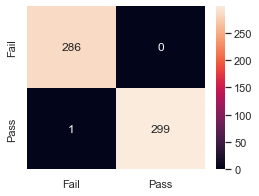

In [80]:
y_predict_train = svc_result.predict(X_train)
y_predict_test = svc_result.predict(X_test)
get_confusion_matrix(y_test,y_predict_test)

#### Insights on the confusion matrix

- Model correctly predicted 299 cases as Pass.
- Model correctly predicted 286 cases as Fail.
- Model incorrectly predicted 1 case as Fail, where actually it is Pass.

In [81]:
print("classification  Matrix for SVC model :\n",classification_report(y_test,y_predict_test))

classification  Matrix for SVC model :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       300

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



#### Insights on Test data prediction:
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the case as Pass for 100% of the time.
<br>Model predicted correctly that the case as Fail for 100% the time.

By F1 score we can say that precison and recall is balanced for Pass by 100% and for fail by 100%
Overall Test accuracy is 100%

## D. Use any other technique/method which can enhance the model performance. [4 Marks]
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.

In [82]:
# Dimmensionality reduction/attribute removal- Lets us perform Principal Component Analysis and identify most accurate data representation in lower dimensionla space.
X_res_scaled.describe().apply(lambda x: x.apply('{0:.8f}'.format))

0              1              2              3  \
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000   
mean      0.00000000     0.00000000     0.00000000    -0.00000000   
std       1.00017093     1.00017093     1.00017093     1.00017093   
min      -3.70553388    -4.67459115    -5.20568865    -3.71882201   
25%      -0.65277248    -0.55687217    -0.68898674    -0.72695240   
50%      -0.15230441     0.04782946    -0.03406904    -0.20988458   
75%       0.55036301     0.54613590     0.61115157     0.50846356   
max       4.83014906     4.88837619     4.29904375     6.28153308   

                   4              6              7              8  \
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000   
mean      0.00000000    -0.00000000     0.00000000     0.00000000   
std       1.00017093     1.00017093     1.00017093     1.00017093   
min      -0.05296879    -3.60103559   -18.42133832    -4.35317513   
25%      -0.04307611    -0.45401258    -0.14008499    -0.63881023   
50%      -0.03749978     0.03141637     0.03440044    -0.01900459   
75%      -0.03299536     0.51899873     0.23598132     0.67116577   
max      27.06844750     5.29225570     0.99211485     2.98411445   

                   9             10  ...            565            570  \
count  2926.00000000  2926.00000000  ...  2926.00000000  2926.00000000   
mean     -0.00000000     0.00000000  ...    -0.00000000     0.00000000   
std       1.00017093     1.00017093  ...     1.00017093     1.00017093   
min      -3.87111053    -4.12749970  ...    -1.70023184   -11.14894956   
25%      -0.59849874    -0.58860691  ...    -0.75092879     0.04686911   
50%      -0.01644628     0.07712539  ...    -0.10126175     0.12570685   
75%       0.55721031     0.63417155  ...     0.31047274     0.22296781   
max       5.75907510     6.13879323  ...     6.95326655     3.11354679   

                 571            572            573            582  \
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000   
mean     -0.00000000     0.00000000    -0.00000000    -0.00000000   
std       1.00017093     1.00017093     1.00017093     1.00017093   
min      -3.86443440    -0.28406076    -1.31291688    -6.92224829   
25%      -0.38448608    -0.22643027    -0.47597226    -0.63377708   
50%       0.15096468    -0.20998484    -0.17158256     0.04108325   
75%       0.68476138    -0.19067934     0.17854181     0.65459263   
max       2.22889536     6.16569256     9.51095706     2.89390189   

                 583            586            587            589  
count  2926.00000000  2926.00000000  2926.00000000  2926.00000000  
mean      0.00000000    -0.00000000     0.00000000     0.00000000  
std       1.00017093     1.00017093     1.00017093     1.00017093  
min      -0.71576452    -3.46538861    -1.68756618    -1.20668988  
25%      -0.27704532    -0.63048603    -0.68967711    -0.59839182  
50%      -0.10816697    -0.07718680    -0.16417585    -0.27821941  
75%       0.10366492     0.53530100     0.47858327     0.22972524  
max      35.32381414     7.30948958     7.64634745     7.77462473  

[8 rows x 227 columns]

In [83]:
# PCA - Step 1 - Create covariance matrix
cov_matrix = np.cov(X_res_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00034188 -0.17648752  0.04406163 ...  0.01203815 -0.04563069
  -0.02415884]
 [-0.17648752  1.00034188 -0.01788936 ...  0.01929288  0.09172351
   0.10906297]
 [ 0.04406163 -0.01788936  1.00034188 ... -0.05654321 -0.10102161
  -0.07571758]
 ...
 [ 0.01203815  0.01929288 -0.05654321 ...  1.00034188  0.22163562
  -0.48690628]
 [-0.04563069  0.09172351 -0.10102161 ...  0.22163562  1.00034188
   0.37191804]
 [-0.02415884  0.10906297 -0.07571758 ... -0.48690628  0.37191804
   1.00034188]]


In [84]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.08550981 -0.02592968 -0.00821957 ...  0.00197624 -0.00099736
   0.00657394]
 [ 0.02683748 -0.01001831 -0.05032731 ...  0.00913839  0.01465185
   0.00069096]
 [ 0.02247547  0.0077225   0.01007067 ... -0.03704964 -0.01321748
  -0.05222717]
 ...
 [-0.04792376 -0.00042063 -0.022792   ... -0.0594848   0.13472392
   0.01630872]
 [ 0.04236164 -0.04130012 -0.0043892  ...  0.02405728 -0.08995292
  -0.03874568]
 [ 0.05639669 -0.02598359  0.0131007  ... -0.07892103  0.09434834
   0.03541839]]

 Eigen Values 
%s [9.95019802e+00 6.70714441e+00 6.33550114e+00 5.54750126e+00
 5.06974184e+00 4.37168334e+00 4.24546801e+00 4.12465796e+00
 3.87505796e+00 3.68326921e+00 3.52799997e+00 3.30113350e+00
 3.13879858e+00 3.00982609e+00 2.85153586e+00 2.82735919e+00
 2.73432551e+00 2.68555007e+00 2.62590794e+00 2.44421737e+00
 2.43654886e+00 2.37755728e+00 2.35474646e+00 2.25917617e+00
 2.19604978e+00 2.19245103e+00 2.13885274e+00 2.10808719e+00
 2.08420539e+00 2.03543951e+00 1.98870771e+0

In [85]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  4.38184908   7.33552844  10.12554425  12.56854219  14.80114536
  16.72633887  18.59594991  20.41235886  22.11884943  23.74088045
  25.29453429  26.74828112  28.1305392   29.45600063  30.71175452
  31.95686152  33.16099853  34.34365591  35.5000482   36.57642795
  37.64943065  38.69645476  39.73343347  40.72832513  41.69541732
  42.66092469  43.60282855  44.53118393  45.44902229  46.34538523
  47.22116851  48.07983646  48.91536517  49.73651001  50.54705974
  51.35062739  52.13628218  52.91743148  53.68359383  54.44335683
  55.18809335  55.92257833  56.63564568  57.34433089  58.03904907
  58.70762832  59.36478574  60.01150102  60.65111125  61.28702806
  61.90792972  62.52239198  63.11534835  63.70401706  64.28760948
  64.86497852  65.43339631  65.99793676  66.55571711  67.10861916
  67.64801983  68.17787377  68.70400272  69.21564183  69.71852142
  70.21292451  70.70141302  71.18598772  71.6648969   72.13817139
  72.60174546  73.05022978  73.49335058  73.93

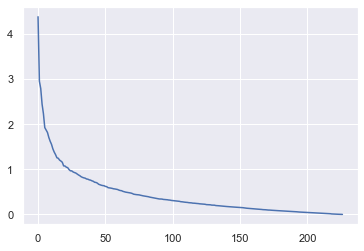

In [86]:
plt.plot(var_exp)

#### Insights:
- Visually we can observe that their is steep drop in variance explained with increase in number of PC's.

In [87]:
# PCA can be done using scikit learn PCA. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X_res_scaled)
X_reduced.transpose()

array([[ 2.63390486e+00,  1.57563602e+00,  1.37245712e+00, ...,
        -3.13034801e+00,  1.71723661e+00,  1.71271900e+00],
       [-3.29431145e+00, -3.23887068e+00,  1.53547829e+00, ...,
         8.00289414e-01, -6.90705283e-01, -8.62824477e-01],
       [ 8.78217081e-01, -4.52127989e-02,  1.88942343e+00, ...,
        -1.09268885e+00,  3.09779695e+00,  1.57089505e+00],
       ...,
       [ 5.45575074e-01,  1.60602176e-01, -8.71162749e-02, ...,
        -3.37880085e-02, -1.67754611e-01, -4.19327845e-02],
       [ 1.03271466e-01, -5.52436705e-02, -2.40895834e-01, ...,
        -1.20859226e-01, -6.22076803e-02,  7.38381731e-02],
       [-5.41694778e-01, -1.16928208e+00,  1.04451453e-04, ...,
         1.93478478e-01, -1.78145492e-01, -1.51741017e-03]])

In [88]:
pca.components_

array([[-0.08550981,  0.02683748,  0.02247547, ..., -0.04792376,
         0.04236164,  0.05639669],
       [ 0.02592968,  0.01001831, -0.0077225 , ...,  0.00042063,
         0.04130012,  0.02598359],
       [-0.00821957, -0.05032731,  0.01007067, ..., -0.022792  ,
        -0.0043892 ,  0.0131007 ],
       ...,
       [-0.03130077, -0.00252616,  0.01644314, ..., -0.03123154,
         0.04698389, -0.04052656],
       [ 0.03303632,  0.03017653, -0.01849477, ..., -0.04306764,
         0.06987817, -0.06660205],
       [ 0.01524444,  0.02753609, -0.02993216, ...,  0.01044275,
        -0.0345338 ,  0.01145953]])

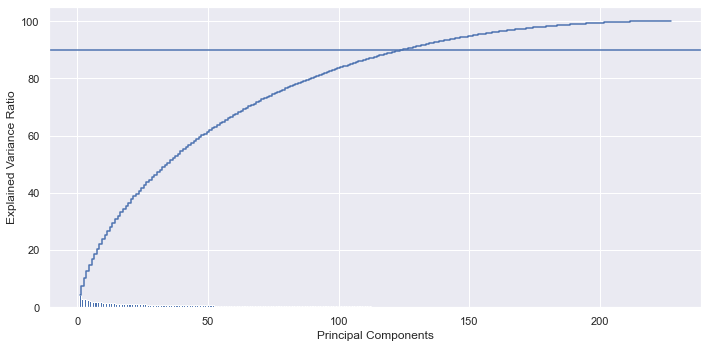

In [89]:
# Ploting 
plt.figure(figsize=(10, 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 1, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.axhline(90)
plt.tight_layout()
plt.show()


### Insights:

- On checking Explained Variance Ratio, minimum number of components with 90% variation explained will be 125 components.

In [90]:
pca_ = PCA(n_components=125)
X_reduced = pca_.fit_transform(X_res_scaled)
X_reduced.transpose()

array([[ 2.63390586,  1.57563099,  1.37245689, ..., -3.13034956,
         1.7172373 ,  1.71271716],
       [-3.29431498, -3.23888104,  1.53548416, ...,  0.80028847,
        -0.69070477, -0.8628326 ],
       [ 0.87822601, -0.04522223,  1.88942872, ..., -1.09268397,
         3.09779344,  1.57090297],
       ...,
       [ 0.55112687,  2.3331527 ,  0.2920885 , ..., -0.03545873,
         0.7079595 ,  0.29871133],
       [ 0.81276268,  2.16787372, -0.18300827, ...,  0.33706562,
         0.44963101, -0.30834435],
       [ 0.78773343, -1.30115354,  0.44311353, ..., -0.09005175,
        -0.19925438, -0.09383924]])

In [91]:
pca_.components_

array([[-0.08550981,  0.02683748,  0.02247547, ..., -0.04792377,
         0.04236162,  0.05639669],
       [ 0.02592965,  0.01001833, -0.00772268, ...,  0.00042048,
         0.04129989,  0.02598354],
       [-0.00821971, -0.05032721,  0.01007066, ..., -0.02279207,
        -0.00438928,  0.01310072],
       ...,
       [ 0.1625122 ,  0.00210396,  0.12134186, ..., -0.00669165,
         0.0648217 , -0.0421625 ],
       [-0.01651834,  0.06552111,  0.04307175, ..., -0.02713261,
         0.03683664,  0.04962178],
       [-0.14303879, -0.06828343,  0.0614862 , ..., -0.03185042,
        -0.01131079, -0.00522242]])

In [92]:
# SplitTrain and test based on the reduced dataframe X_reduced
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y_res,test_size=0.20,random_state=1)

### Logistic Regression model

In [93]:
# Let us start with a simple logistic regression model
logit_model = LogisticRegression(solver='lbfgs', max_iter=3000)
logit_model.fit(X_train, y_train.values.ravel())
y_predict_train = logit_model.predict(X_train)
y_predict_test = logit_model.predict(X_test)

print('Accuracy on Training data:',logit_model.score(X_train, y_train))
print('Accuracy on Test data:',logit_model.score(X_test, y_test))

Accuracy on Training data: 0.8910256410256411
Accuracy on Test data: 0.8959044368600683


In [94]:
coef_df = pd.DataFrame(logit_model.coef_)
coef_df['intercept'] = logit_model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.391058  0.039121  0.020211 -0.255009 -0.495457  0.020069 -0.510665   

          7         8         9  ...     116       117       118       119  \
0  0.574417 -0.141979  0.552683  ...  0.0765 -0.119148  0.094941  0.183563   

       120       121       122       123      124  intercept  
0  0.34163  0.552203  0.011934  0.243817  0.46365   0.709567  

[1 rows x 126 columns]


In [95]:
### Using gridsearchcv
grid={"C":np.logspace(-3,3,7), "solver":['lbfgs'],"penalty":["l2"]}# l1 is lasso, l2 is ridge
logreg=LogisticRegression(max_iter=3000)
logreg_cv=GridSearchCV(logreg,grid,cv=20)
logreg_cv.fit(X_train,y_train.values.ravel())

print(" Best cross-validation accuracy: {:.2f}". format( logreg_cv.best_score_)) 
print(" Best parameters: ", logreg_cv.best_params_) 
print(" Train set accuracy: {:.6f}". format( logreg_cv.score( X_train, y_train.values.ravel())))
print(" Test set accuracy: {:.6f}". format( logreg_cv.score( X_test, y_test.values.ravel())))


 Best cross-validation accuracy: 0.87
 Best parameters:  {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}
 Train set accuracy: 0.893590
 Test set accuracy: 0.894198


### With just 125 features we are able to create model with test accuracy of 89.42%. Also test set accuracy is closer to train set accuracy.

## E. Display and explain the classification report in detail. [3 Marks]

Confusion Matrix


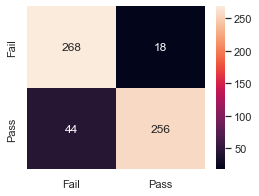

In [96]:
y_predict_train = logreg_cv.predict(X_train)
y_predict_test = logreg_cv.predict(X_test)
get_confusion_matrix(y_test,y_predict_test)

##### Insights on the confusion matrix

- Model correctly predicted 256 cases as Pass.
- Model correctly predicted 268 cases as Fail.
- Model incorrectly predicted 44 cases as Fail, where actually these are Pass.
- Model incorrectly predicted 18 cases as Pass, where actually these are Fail.

In [97]:
print("classification  Matrix for logistic regression model :\n",classification_report(y_test,y_predict_test))

classification  Matrix for logistic regression model :
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       286
           1       0.93      0.85      0.89       300

    accuracy                           0.89       586
   macro avg       0.90      0.90      0.89       586
weighted avg       0.90      0.89      0.89       586



#### Insights on Test data prediction:
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the case as Pass for 93% of the time.
<br>Model predicted correctly that the case as Fail for 86% the time.

By F1 score we can say that precison and recall is balanced for Pass by 89% and for fail by 90%
Overall Test accuracy is 89%

## F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]

#### Just above this we saw how logistic regression model worked with all applied techniques. We will see rest of the models on the data reduced using PCA.
### SVC model

In [98]:
# Using RandomizedSearchCV
from scipy import stats

svc_clf = SVC(kernel='rbf')
param = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
        "gamma": [0.001, 0.01, 0.1, 1, 10]}
               
svc_rand = RandomizedSearchCV(svc_clf, param_distributions = param, n_iter = 20, n_jobs = 4, cv = 3, random_state = 1) 

svc_result = svc_rand.fit(X_train,y_train.values.ravel())

print('Best Score: %s' % svc_result.best_score_)
print('Best Hyperparameters: %s' % svc_result.best_params_)
print("Train set accuracy: {:.6f}". format( svc_result.score( X_train, y_train.values.ravel())))
print("Test set accuracy: {:.6f}". format( svc_result.score( X_test, y_test.values.ravel())))


Best Score: 0.9974358974358974
Best Hyperparameters: {'gamma': 0.01, 'C': 10}
Train set accuracy: 1.000000
Test set accuracy: 0.996587


##### Best parameters for rbf_model are {'g': 0.01, 'c': 10} and the accuracy is 'acc': 99.65870307167235

Confusion Matrix


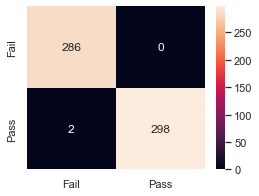

In [99]:
y_predict_train = svc_result.predict(X_train)
y_predict_test = svc_result.predict(X_test)
get_confusion_matrix(y_test,y_predict_test)

In [100]:
print("classification  Matrix for SVC model :\n",classification_report(y_test,y_predict_test))

classification  Matrix for SVC model :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       286
           1       1.00      0.99      1.00       300

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



#### Insights on Test data prediction:
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the case as Pass for 100% of the time.
<br>Model predicted correctly that the case as Fail for 99% the time.

By F1 score we can say that precison and recall is balanced for Pass by 100% and for fail by 100%
Overall Test accuracy is 99.65%

### XGBClassifier model

In [101]:
xgb_clf = XGBClassifier(objective='binary:logistic',seed=5,use_label_encoder=False)

xgb_clf.fit(X_train, y_train.values.ravel(),verbose=True,eval_metric='aucpr',eval_set=[(X_test, y_test.values.ravel())])  


[0]	validation_0-aucpr:0.88418
[1]	validation_0-aucpr:0.94178
[2]	validation_0-aucpr:0.95904
[3]	validation_0-aucpr:0.97346
[4]	validation_0-aucpr:0.98265
[5]	validation_0-aucpr:0.98819
[6]	validation_0-aucpr:0.99246
[7]	validation_0-aucpr:0.99465
[8]	validation_0-aucpr:0.99663
[9]	validation_0-aucpr:0.99714
[10]	validation_0-aucpr:0.99834
[11]	validation_0-aucpr:0.99899
[12]	validation_0-aucpr:0.99927
[13]	validation_0-aucpr:0.99959
[14]	validation_0-aucpr:0.99959
[15]	validation_0-aucpr:0.99964
[16]	validation_0-aucpr:0.99976
[17]	validation_0-aucpr:0.99980
[18]	validation_0-aucpr:0.99986
[19]	validation_0-aucpr:0.99992
[20]	validation_0-aucpr:0.99996
[21]	validation_0-aucpr:0.99996
[22]	validation_0-aucpr:0.99994
[23]	validation_0-aucpr:0.99998
[24]	validation_0-aucpr:1.00000
[25]	validation_0-aucpr:1.00000
[26]	validation_0-aucpr:1.00000
[27]	validation_0-aucpr:1.00000
[28]	validation_0-aucpr:1.00000
[29]	validation_0-aucpr:1.00000
[30]	validation_0-aucpr:1.00000
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [102]:
print("\nTrain set accuracy: {:.6f}". format( xgb_clf.score( X_train, y_train.values.ravel())))
print("Test set accuracy: {:.6f}". format( xgb_clf.score( X_test, y_test.values.ravel())))


Train set accuracy: 1.000000
Test set accuracy: 0.998294


#### Best performing parameters for this model xgb_clf are gamma=0, learning_rate=0.300000012, max_depth=6, estimators=100, random_state=5, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5, tree_method='exact'

Confusion Matrix


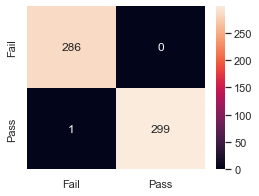

In [103]:
y_predict_train = xgb_clf.predict(X_train)
y_predict_test = xgb_clf.predict(X_test)
get_confusion_matrix(y_test,y_predict_test)

In [104]:
print("classification  Matrix for XGBoost classifier model :\n",classification_report(y_test,y_predict_test))

classification  Matrix for XGBoost classifier model :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       300

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



#### Insights on Test data prediction:
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the case as Pass for 100% of the time.
<br>Model predicted correctly that the case as Fail for 100% the time.

By F1 score we can say that precison and recall is balanced for Pass by 100% and for fail by 100%
Overall Test accuracy is 99.82% i.e ~100%

### RandomForestClassifier model

In [105]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf_clf.fit(X_train, y_train.values.ravel())

print("Train Score Accuracy: ", rf_clf.score(X_train, y_train.values.ravel())*100)
print("Test Score Accuracy: ", rf_clf.score(X_test,y_test.values.ravel())*100)

Train Score Accuracy:  100.0
Test Score Accuracy:  100.0


Confusion Matrix


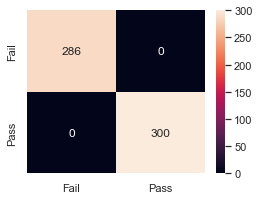

In [106]:
y_predict_train = rf_clf.predict(X_train)
y_predict_test = rf_clf.predict(X_test)
get_confusion_matrix(y_test,y_predict_test)

In [107]:
print("classification  Matrix for RandomForestClassifier model :\n",classification_report(y_test,y_predict_test))

classification  Matrix for RandomForestClassifier model :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       300

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



### KNeighborsClassifier Model

In [108]:
knn = KNeighborsClassifier(n_neighbors= 10 , metric = 'euclidean')
knn.fit(X_train, y_train.values.ravel())

print("Train Score Accuracy: ", knn.score(X_train, y_train.values.ravel())*100)
print("Test Score Accuracy: ", knn.score(X_test,y_test.values.ravel())*100)

Train Score Accuracy:  67.6923076923077
Test Score Accuracy:  63.48122866894198


In [109]:
#for this population, assuming k is less than 50, let us find out the best k value
train_score=[]
test_score=[]
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    knn.fit(X_train, y_train.values.ravel())
    train_score.append(knn.score(X_train, y_train.values.ravel()))
    test_score.append(knn.score(X_test, y_test.values.ravel()))

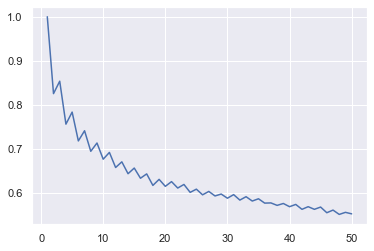

In [110]:
plt.plot(range(1,51),train_score)
plt.show()

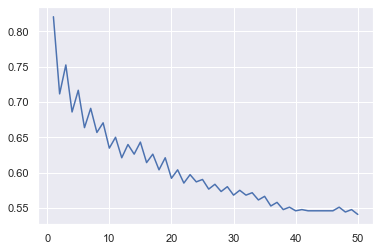

In [111]:
plt.plot(range(1,51),test_score)
plt.show()

In [112]:
# Finding best parameters using GridSearchCV
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train.values.ravel())
param_grid = {'n_neighbors': list(range(1,40)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

knn_gs = GridSearchCV(knn_clf,param_grid,cv=10)
knn_gs.fit(X_train, y_train.values.ravel())

print('Best Score: %s' % knn_gs.best_score_)
print('Best Hyperparameters: %s' % knn_gs.best_params_)
print("Train set accuracy: {:.6f}". format( knn_gs.score( X_train, y_train.values.ravel())))
print("Test set accuracy: {:.6f}". format( knn_gs.score( X_test, y_test.values.ravel())))

Best Score: 0.8183760683760684
Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 1}
Train set accuracy: 1.000000
Test set accuracy: 0.820819


Confusion Matrix


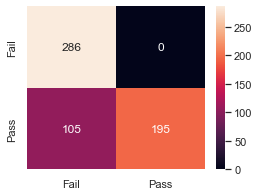

In [113]:
y_predict_train = knn_gs.predict(X_train)
y_predict_test = knn_gs.predict(X_test)
get_confusion_matrix(y_test,y_predict_test)

In [114]:
print("classification  Matrix for KNN model :\n",classification_report(y_test,y_predict_test))

classification  Matrix for KNN model :
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       286
           1       1.00      0.65      0.79       300

    accuracy                           0.82       586
   macro avg       0.87      0.82      0.82       586
weighted avg       0.87      0.82      0.82       586



### DecisionTreeClassifier model

In [115]:
dt_clf=DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt_clf.fit(X_train, y_train.values.ravel())

print("Train score: {}".format(dt_clf.score(X_train, y_train.values.ravel())))
print("Test score: {}".format(dt_clf.score(X_test, y_test.values.ravel())))   

Train score: 0.7594017094017094
Test score: 0.7491467576791809


In [116]:
# Finding best parameters using GridSearchCV
dt_clf=DecisionTreeClassifier()
param_grid = {"max_depth": [3, None],
              "criterion": ["gini", "entropy"]}
dt_gs = GridSearchCV(dt_clf, param_grid=param_grid)
dt_gs.fit(X_train, y_train.values.ravel())


print('Best Score: %s' % dt_gs.best_score_)
print('Best Hyperparameters: %s' % dt_gs.best_params_)
print("Train set accuracy: {:.6f}". format( dt_gs.score( X_train, y_train.values.ravel())))
print("Test set accuracy: {:.6f}". format( dt_gs.score( X_test, y_test.values.ravel())))
print("Mean test score: {}".format(dt_gs.cv_results_['mean_test_score']))

Best Score: 0.9098290598290598
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None}
Train set accuracy: 1.000000
Test set accuracy: 0.926621
Mean test score: [0.74529915 0.90982906 0.73547009 0.90299145]


Confusion Matrix


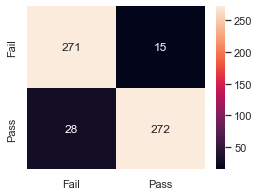

In [117]:
y_predict_train = dt_gs.predict(X_train)
y_predict_test = dt_gs.predict(X_test)
get_confusion_matrix(y_test,y_predict_test)

In [118]:
print("classification  Matrix for DecisionTreeClassifier model :\n",classification_report(y_test,y_predict_test))

classification  Matrix for DecisionTreeClassifier model :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       286
           1       0.95      0.91      0.93       300

    accuracy                           0.93       586
   macro avg       0.93      0.93      0.93       586
weighted avg       0.93      0.93      0.93       586



### GradientBoostingClassifier Model

In [119]:
gb_clf=GradientBoostingClassifier()
gb_clf.fit(X_train, y_train.values.ravel())

print("Train score: {}".format(gb_clf.score(X_train, y_train.values.ravel())))
print("Test score: {}".format(gb_clf.score(X_test, y_test.values.ravel())))   

Train score: 1.0
Test score: 0.9931740614334471


Confusion Matrix


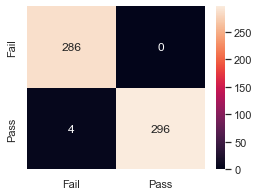

In [120]:
y_predict_train = gb_clf.predict(X_train)
y_predict_test = gb_clf.predict(X_test)
get_confusion_matrix(y_test,y_predict_test)

In [121]:
print("classification  Matrix for GradientBoostingClassifier model :\n",classification_report(y_test,y_predict_test))

classification  Matrix for GradientBoostingClassifier model :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       286
           1       1.00      0.99      0.99       300

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



### GaussianNB Model

In [122]:
gnb_clf=GaussianNB()
gnb_clf.fit(X_train, y_train.values.ravel())

print("Train score: {}".format(gnb_clf.score(X_train, y_train.values.ravel())))
print("Test score: {}".format(gnb_clf.score(X_test, y_test.values.ravel())))   

Train score: 0.9487179487179487
Test score: 0.9419795221843004


Confusion Matrix


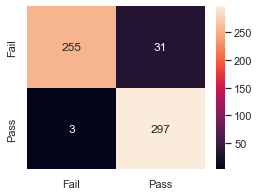

In [123]:
y_predict_train = gnb_clf.predict(X_train)
y_predict_test = gnb_clf.predict(X_test)
get_confusion_matrix(y_test,y_predict_test)

In [124]:
print("classification  Matrix for GaussianNB model :\n",classification_report(y_test,y_predict_test))

classification  Matrix for GaussianNB model :
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       286
           1       0.91      0.99      0.95       300

    accuracy                           0.94       586
   macro avg       0.95      0.94      0.94       586
weighted avg       0.95      0.94      0.94       586



# 6. Post Training and Conclusion: [5 Marks]
## A. Display and compare all the models designed with their train and test accuracies. [1 Marks]

In [125]:
# Define the ML pipelines
ml_pipelines = {
    "GBC": make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    "XGB": make_pipeline(XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='aucpr')),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier(algorithm='auto', n_neighbors=1)),
    "LogReg": make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000)),
    "DTree": make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    "GNB": make_pipeline(StandardScaler(), GaussianNB()),
    "RF": make_pipeline(StandardScaler(), RandomForestClassifier()),
    "SVC": make_pipeline(StandardScaler(), SVC(kernel="rbf",gamma=0.01, C=1))
}

In [126]:
### Function to execution all the defined ML pipelines in loop
def pipeline_execution(pipelines,X_train,y_train,X_test,y_test):
    model_results=[]
    ### Execute all models defined in pipelines and get the accuracy scores
    for model in pipelines:
        res={}
        base_model = pipelines[model]
        base_model.fit(X_train, y_train.values.ravel())
        
        res["model_name"]=model
        res["train_score"]=base_model.score(X_train, y_train.values.ravel())
        res["test_score"]=base_model.score(X_test, y_test.values.ravel())
        predicted_labels = base_model.predict(X_test)
        res["accuracy_score"]=accuracy_score(y_test.values.ravel(), predicted_labels) * 100
        model_results.append(res)

    ### Convert the model_results to pandas daatframe and display
    print("-------Completed all pipelines-------")

    results_df=pd.DataFrame(model_results)
    return results_df

In [127]:
results_df=pipeline_execution(ml_pipelines,X_train,y_train,X_test,y_test)

-------Completed all pipelines-------


In [128]:
results_df.head(10)

model_name  train_score  test_score  accuracy_score
0        GBC     1.000000    0.993174       99.317406
1        XGB     1.000000    0.998294       99.829352
2        KNN     1.000000    0.701365       70.136519
3     LogReg     0.890598    0.890785       89.078498
4      DTree     1.000000    0.931741       93.174061
5        GNB     0.948718    0.941980       94.197952
6         RF     1.000000    1.000000      100.000000
7        SVC     1.000000    0.996587       99.658703

##  B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]

RandomForestClassifier, Support Vector Classifier, XGBoost Classifier are best models in this problem to correctly predict Pass and Fail cases.
However,
RandomForestClassifier, Support Vector Classifier are always good with higher dimensional data, where as XGBoost on high dimensional data will lead to high memory consumption and potentially lead to out-of-memory error. So XGBoost may not be preferred for productionizing the model and to handle larger data.

Within RandomForestClassifier and Support Vector Classifier, RandomForestClassifier suits very well for multi class problem and when we have mixture of numerical and categorical features. In this problem we just do binary classification - Pass or Fail, and also we have all features as numerical values. In other words SVM is sufficent for this problem, and RandomForestClassifier may tend to overfit in this case. 

Finally Support Vector Classifier can be selected which has 99.65% accuracy in test and 100% accuracy in train dataset.

## C. Pickle the selected model for future use. [2 Marks]

In [129]:
### Function to save the tuned model as pickle file
def save_tuned_model(file_name):
    ### model using the best parameters identified 
    svc_tuned = Pipeline([('scl', StandardScaler()), ('svc', SVC(kernel='rbf',gamma=0.01, C=1))])

    svc_tuned.fit(X_train, y_train.values.ravel())
    pickle.dump(svc_tuned, open(file_name, 'wb'))

In [130]:
file_name='svc_model.pkl'
save_tuned_model(file_name)

In [131]:
### Function for calculating recall of Fail 
def recall_0(correct, pred):
    return metrics.recall_score(y_true=correct, y_pred=pred, pos_label=0, average="binary")

### Function for calculating recall of Pass
def recall_1(correct, pred):
    return metrics.recall_score(y_true=correct, y_pred=pred, pos_label=1, average="binary")

### Function for getting and displaying score
def print_metrics(model,X_train,y_train,X_test,y_test):
    y_pred = model.predict(X_test)
    
    ## Print classification report
    print("Classification report for {}:\n{}".format(model, metrics.classification_report(y_test, y_pred)))

    ## Print Cross-Validation results
    scoring = {
        "f1": "f1",
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall",
        "recall_0": metrics.make_scorer(recall_0),
        "recall_1": metrics.make_scorer(recall_1) }
    
    cv_scores = cross_validate(model, X_reduced, y_res.values.ravel(), scoring=scoring, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=5))

    for c in cv_scores:
        print("Metric: {}, Mean_value: {}".format(c,np.mean(cv_scores[c])))
    
    ### Print the confusion matrix for train dataset
    print("Confusion Matrix for train dataset:")
    cm_train=metrics.confusion_matrix(y_train, model.predict(X_train), labels=[0,1])

    df_cm_train = pd.DataFrame(cm_train, index = [i for i in ["Fail","Pass"]],
                      columns = [i for i in ["Fail","Pass"]])
    plt.figure(figsize = (4,4))
    sns.heatmap(df_cm_train, annot=True,fmt='g')
    
    ### Print the confusion matrix for test dataset
    print("Confusion Matrix for test dataset:")
    cm_test=metrics.confusion_matrix(y_test, model.predict(X_test), labels=[0,1])

    df_cm_test = pd.DataFrame(cm_test, index = [i for i in ["Fail","Pass"]],
                      columns = [i for i in ["Fail","Pass"]])
    plt.figure(figsize = (4,4))
    sns.heatmap(df_cm_test, annot=True,fmt='g')

In [132]:
### Function to load the model using teh pickle file provided
def load_model(file_name):
    loaded_model = pickle.load(open(file_name, 'rb'))
    
    return loaded_model

In [133]:
### Function to calculate scores and also print various metrics like classification report,mean values of scoring metrics, confusion metrics etc
def model_scoring(model,X_train,y_train,X_test,y_test):
    train_results=model.score(X_train, y_train)
    test_results=model.score(X_test, y_test)
    print("Train score results :{}".format(train_results))
    print("Test score results  :{}".format(test_results))
    
    ### Print Classification report and Cross-Validation results
    print_metrics(model,X_train,y_train,X_test,y_test)


Train score results :1.0
Test score results  :0.9965870307167235
Classification report for Pipeline(steps=[('scl', StandardScaler()), ('svc', SVC(C=1, gamma=0.01))]):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       286
           1       1.00      0.99      1.00       300

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586

Metric: fit_time, Mean_value: 0.24304592609405518
Metric: score_time, Mean_value: 0.061144900321960446
Metric: test_f1, Mean_value: 0.9979380229957358
Metric: test_accuracy, Mean_value: 0.997948711954743
Metric: test_precision, Mean_value: 0.9986486486486486
Metric: test_recall, Mean_value: 0.9972602739726029
Metric: test_recall_0, Mean_value: 0.9986394557823128
Metric: test_recall_1, Mean_value: 0.9972602739726029
Confusion Matrix for train dataset:
Confusion Matrix for test dataset:


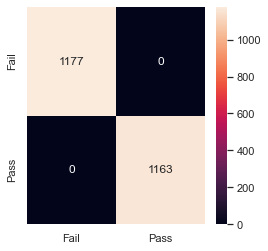

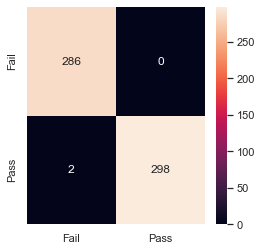

In [134]:
loaded_model=load_model(file_name)
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y_res,test_size=0.20,random_state=1)
model_scoring(loaded_model,X_train,y_train,X_test,y_test)

## D. Write your conclusion on the results. [1 Marks]

### Support Vector Machine - Classifier model results:
#### Insights on the confusion matrix for Train dataset

- Model correctly predicted all 1163 cases as Pass.
- Model correctly predicted all 1177 cases as Fail.

#### Insights on the confusion matrix for Test dataset

- Model correctly predicted all 298 cases as Pass.
- Model correctly predicted all 286 cases as Fail.
- Model incorrectly predicted 2 cases as Fail whereas those are Pass. 

#### Insights on Test data prediction:
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the case as Pass for 100% of the time.
<br>Model predicted correctly that the case as Fail for 99% the time.

By F1 score we can say that precison and recall is balanced for Pass by 100% and for fail by 100%
Overall Test accuracy is 99.65%

# THE END 